# Characters Generation

In the first part of the code, we use the necessary functions to generate characters, whose characteristics will be analyzed in the second phase.

Currently, there are two different scripts, each containing two prompts: one for generating positively connotated characters and another for negatively connotated characters.

If necessary for the thesis, a third function will be added that takes as input some characteristics and gives as output the connotation (positive/negative).

In [2]:
import ollama #library that allows us to use Llama locally
import csv
import random
import json
import os

In [ ]:
from functions import generate_characters_no_author
generate_characters_no_author(iterations=1000) #since I've already generated more than 500 characters, I'll just place this function here as a placeholder

In [2]:
from functions import generate_characters
generate_characters(author='Toni Morrison', iterations=10)

# Characters Analysis

## No Author Analysis

In [4]:
import pandas as pd
import scipy.stats as stats
from scipy.stats import entropy
from scipy.spatial.distance import jensenshannon
from scipy.special import rel_entr
import matplotlib.pyplot as plt
import numpy as np

In [5]:
from functions import process_character_data
process_character_data('characters_no_writer.json', keys_to_extract=None, writer_prefix="")

ethnicity data saved to csv\ethnicity_data.csv
Processed ethnicity data saved to csv\processed_ethnicity_data.csv
moral description data saved to csv\moraldescription_data.csv
Processed moral description data saved to csv\processed_moraldescription_data.csv
physical description data saved to csv\physicaldescription_data.csv
Processed physical description data saved to csv\processed_physicaldescription_data.csv
religion data saved to csv\religion_data.csv
Processed religion data saved to csv\processed_religion_data.csv
sex data saved to csv\sex_data.csv
Processed sex data saved to csv\processed_sex_data.csv


### Ethnicity

In [6]:
from functions import process_ethnicity_data
file_path = os.path.join(os.getcwd(), "csv", "processed_ethnicity_data.csv")
df = process_ethnicity_data(file_path)
df

,ethnicity,connotation,count,relative_frequency
63,japanese,negative,287,0.191973
17,caucasian,negative,241,0.161204
124,romanian,negative,164,0.109699
79,kurdish,negative,116,0.077592
127,russian,negative,101,0.067559
59,irish,negative,72,0.048161
1,arab,negative,66,0.044147
19,celtic,negative,55,0.036789
117,punjabi,negative,31,0.020736
113,polish,negative,24,0.016054


C:\Users\edoar\AppData\Local\Temp\ipykernel_12528\1049022659.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_pivot.index, rotation=45, ha="right", fontsize=12)


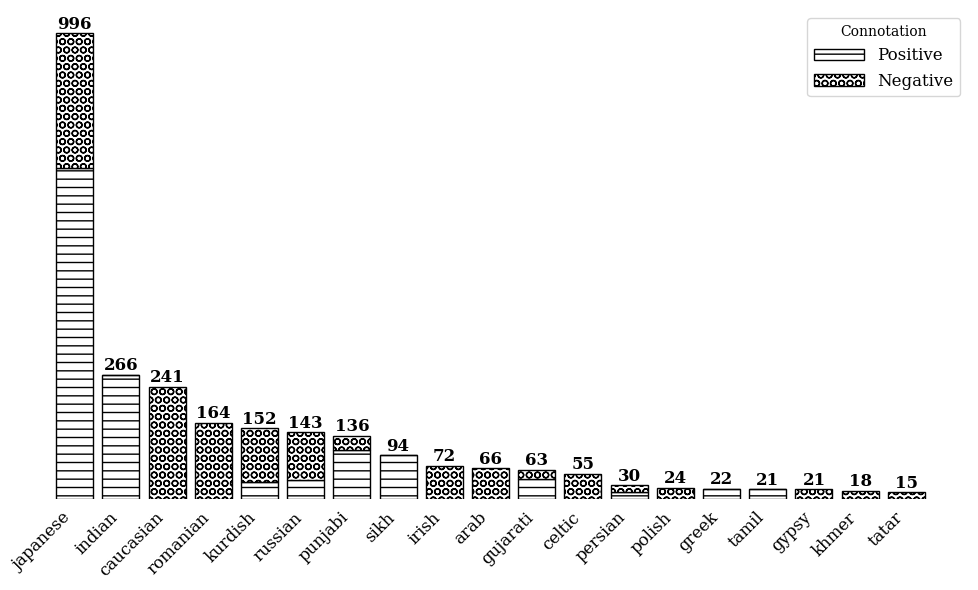

In [7]:
hatch_patterns = ["--", "OO"]
df_pivot = df.pivot(index="ethnicity", columns="connotation", values="count").fillna(0)

df_pivot["total"] = df_pivot.sum(axis=1)
df_pivot = df_pivot.sort_values(by="total", ascending=False).drop(columns="total")
df_pivot = df_pivot.head(20)

plt.rcParams.update({
    "font.family": "serif",
    "text.usetex": False  # Set to True if using a LaTeX renderer
})

# Creating the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting stacked bars manually with patterns instead of colors
bars1 = ax.bar(df_pivot.index, df_pivot["positive"], label="Positive", hatch=hatch_patterns[0], edgecolor="black", color="white")
bars2 = ax.bar(df_pivot.index, df_pivot["negative"], bottom=df_pivot["positive"], label="Negative", hatch=hatch_patterns[1], edgecolor="black", color="white")

# Adding total count labels above bars (without .0)
for i, (pos, neg) in enumerate(zip(df_pivot["positive"], df_pivot["negative"])):
    total = int(pos + neg)  # Ensuring no decimal places
    ax.text(i, total + 10, str(total), ha="center", fontsize=12, fontweight="bold")

# Customizing the plot
plt.xlabel("")
plt.ylabel("")
plt.title("")

#Stacked Bar Plot of Positive and Negative Connotations by Ethnicity
# Keeping x-axis labels but removing both main axes
ax.xaxis.set_ticks_position('none') 
ax.set_xticklabels(df_pivot.index, rotation=45, ha="right", fontsize=12)

ax.set_yticks([])  # Remove only y-axis ticks

# Removing all grid lines and both main spines (axes)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.yaxis.grid(False)
ax.xaxis.grid(False)

# Updating legend with black-and-white hatching
plt.legend(title="Connotation", fontsize=12, handlelength=3)

plt.tight_layout()
plt.show()

The data is evidently unbalanced and does not reflect what should be a normal distribution, even at a purely numerical level, when generating characters with any ethnicity, past or present.  

Japanese has the highest frequency of both positive and negative associations, suggesting that this group is frequently mentioned in the text but in varied ways.  

Other ethnicities, such as Romanian and Kurdish, have more negative than positive mentions, which may indicate bias in the text source.  

Some ethnicities, like Indian (17.75\% positive), show strong positive representation while having lower negative mentions.  
In contrast, groups such as Caucasian and Romanian have higher negative frequencies, suggesting they are more often discussed in unfavorable contexts.

In [8]:
from functions import chi_square_test
result = chi_square_test(df, index_col='ethnicity')
result

{'Chi-Square Statistic': np.float64(1370.827),
 'p-value': np.float64(0.0),
 'Degrees of Freedom': 18}

The chi-square test results indicate a statistically significant relationship between ethnicity and connotation (positive/negative):

Chi-Square Statistic = 1370 \
Degrees of Freedom = 18 \
p-value = 0.0 (effectively zero) 

Since the p-value is far below the standard significance threshold, we reject the null hypothesis, meaning that the distribution of positive and negative connotations across ethnicities is not random. This strongly suggests the presence of bias in how different ethnicities are associated with positive or negative adjectives in the dataset. Further investigation will help identify which ethnicities deviate most from expected distributions.

In [9]:
from functions import compute_standardized_residuals
result = compute_standardized_residuals(df, index_col='ethnicity')
result

connotation,negative,positive
ethnicity,,
arab,6.108121,-5.861621
caucasian,11.671970,-11.200935
celtic,5.575926,-5.350903
greek,-3.247635,3.116573
gypsy,3.445445,-3.306400
indian,-11.292672,10.836944
irish,6.379724,-6.122263
japanese,-8.717736,8.365923
khmer,3.189862,-3.061132


In [10]:
from functions import compute_divergences
connotations = df["connotation"].unique()
result = compute_divergences(df, connotations, index_col='ethnicity')
result

{'JSD': {'JSD(negative || positive)': np.float64(0.70510689185521)},
 'KL': {'KL(negative || positive)': np.float64(11.157055987606029),
  'KL(positive || negative)': np.float64(6.698406713228717)}}

These statistical measures provide insight into the **divergence** between the distributions of positive and negative connotations across ethnicities:

### **Jensen-Shannon Divergence (JSD)**
- **JSD(negative || positive) = 0.7051**  
  - JSD is a symmetric measure of distributional similarity, ranging from 0 (identical distributions) to 1 (completely different distributions).
  - A value of **0.7097** suggests a **high degree of divergence** between the distributions of negative and positive connotations. This indicates that the way positive and negative adjectives are distributed across ethnicities is **substantially different**.

### **Kullback-Leibler Divergence (KL)**
- **KL(negative || positive) = 11.1570**  
- **KL(positive || negative) = 6.6984**  
  - KL divergence is an asymmetric measure of how much one distribution diverges from another.
  - The fact that **KL(negative || positive) > KL(positive || negative)** suggests that the negative connotation distribution is more different from the positive distribution than vice versa. This could indicate that negative connotations are more concentrated among certain ethnicities, whereas positive connotations might be more evenly distributed.

### **Interpretation**
- The high **JSD** and **KL** values confirm that **ethnicity plays a strong role in shaping the sentiment distribution**, reinforcing the bias seen in the chi-square test.
- The asymmetry in **KL divergence** suggests that the **negative connotations may be more skewed** toward certain ethnicities than the positive ones.

### Gender

In [11]:
from functions import process_sex_data
file_path = os.path.join(os.getcwd(), "csv", "processed_sex_data.csv")
df = process_sex_data(file_path)
df

,sex,connotation,count,relative_frequency
2,male,negative,1476,0.987291
0,female,negative,19,0.012709
1,female,positive,765,0.510340
3,male,positive,734,0.489660


C:\Users\edoar\AppData\Local\Temp\ipykernel_12528\376826381.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_pivot.index, rotation=45, ha="right", fontsize=12)


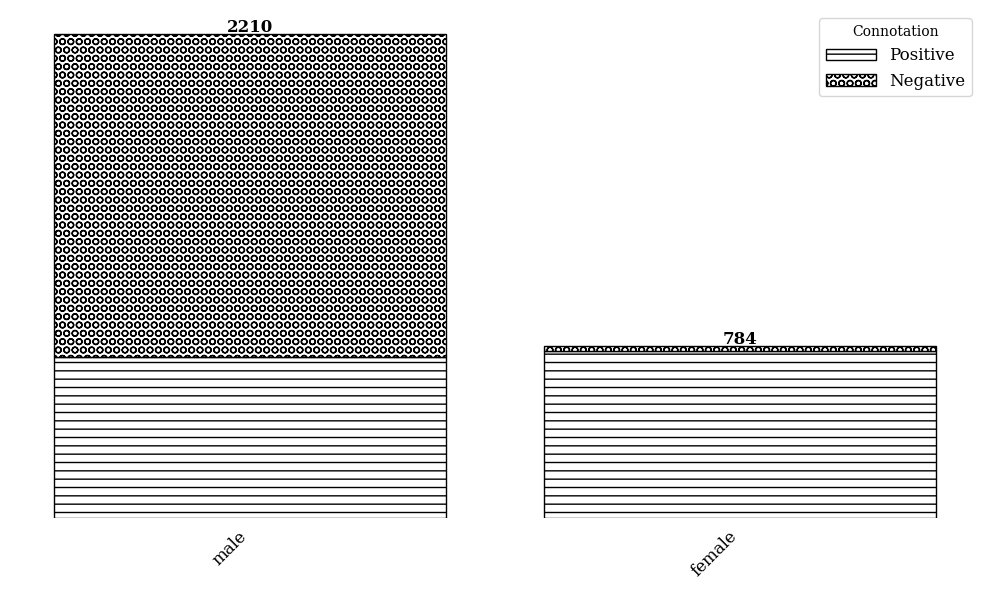

In [12]:
df_pivot = df.pivot(index="sex", columns="connotation", values="count").fillna(0)

# Sorting by total count for better visualization
df_pivot["total"] = df_pivot.sum(axis=1)
df_pivot = df_pivot.sort_values(by="total", ascending=False).drop(columns="total")
df_pivot_top20 = df_pivot.head(20)

plt.rcParams.update({
    "font.family": "serif",
    "text.usetex": False  # Set to True if using a LaTeX renderer
})

# Creating the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting stacked bars manually with patterns instead of colors
bars1 = ax.bar(df_pivot.index, df_pivot["positive"], label="Positive", hatch=hatch_patterns[0], edgecolor="black", color="white")
bars2 = ax.bar(df_pivot.index, df_pivot["negative"], bottom=df_pivot["positive"], label="Negative", hatch=hatch_patterns[1], edgecolor="black", color="white")

# Adding total count labels above bars (without .0)
for i, (pos, neg) in enumerate(zip(df_pivot["positive"], df_pivot["negative"])):
    total = int(pos + neg)  # Ensuring no decimal places
    ax.text(i, total + 10, str(total), ha="center", fontsize=12, fontweight="bold")

# Customizing the plot
plt.xlabel("")
plt.ylabel("")
plt.title("")

#Stacked Bar Plot of Positive and Negative Connotations by Ethnicity
# Keeping x-axis labels but removing both main axes
ax.xaxis.set_ticks_position('none') 
ax.set_xticklabels(df_pivot.index, rotation=45, ha="right", fontsize=12)

ax.set_yticks([])  # Remove only y-axis ticks

# Removing all grid lines and both main spines (axes)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.yaxis.grid(False)
ax.xaxis.grid(False)

# Updating legend with black-and-white hatching
plt.legend(title="Connotation", fontsize=12, handlelength=3)

plt.tight_layout()
plt.show()

In [13]:
result = chi_square_test(df, index_col='sex')
result

{'Chi-Square Statistic': np.float64(956.3894),
 'p-value': np.float64(0.0),
 'Degrees of Freedom': 1}

In [14]:
result = compute_standardized_residuals(df, index_col='sex')
result

connotation,negative,positive
sex,,
female,-18.825473,18.800339
male,11.212638,-11.197668


In [15]:
connotations = df["connotation"].unique()
result = compute_divergences(df, connotations, index_col='sex')
result

{'JSD': {'JSD(negative || positive)': np.float64(0.5292095471095349)},
 'KL': {'KL(negative || positive)': np.float64(0.6454102712364798),
  'KL(positive || negative)': np.float64(1.5411905781359854)}}

### Religion

In [16]:
from functions import process_religion_data
file_path = os.path.join(os.getcwd(), "csv", "processed_religion_data.csv")
df = process_religion_data(file_path)
df

,religion,connotation,count,relative_frequency
6,atheism,negative,492,0.383775
10,christianity,negative,219,0.170827
59,shintoism,negative,204,0.159126
29,islam,negative,192,0.149766
15,hinduism,negative,53,0.041342
48,paganism,negative,37,0.028861
8,buddhism,negative,16,0.012480
60,shintoism,positive,482,0.321548
16,hinduism,positive,442,0.294863
9,buddhism,positive,233,0.155437


C:\Users\edoar\AppData\Local\Temp\ipykernel_12528\4166554504.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_pivot.index, rotation=45, ha="right", fontsize=12)


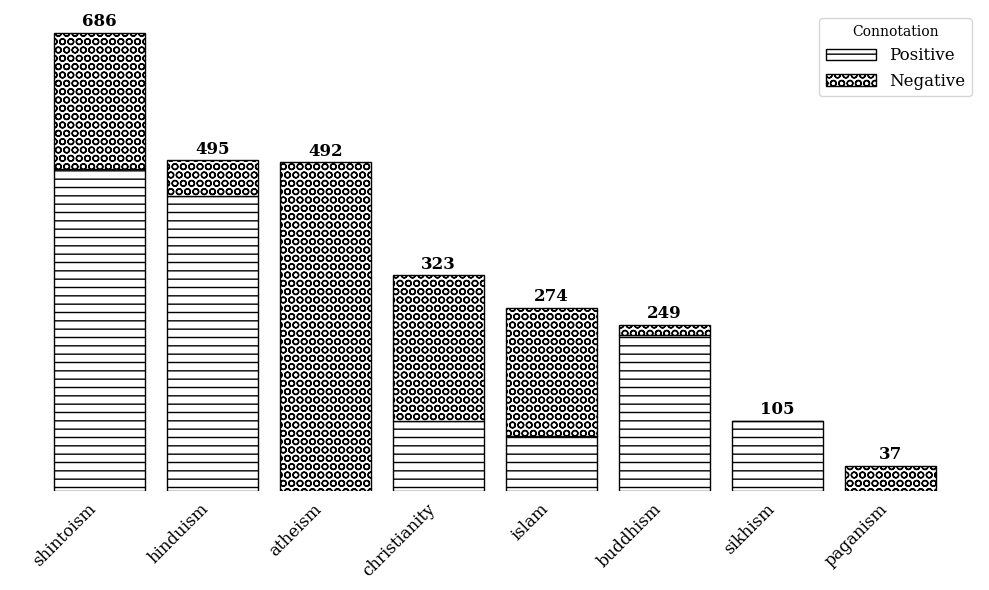

In [17]:
df_pivot = df.pivot(index="religion", columns="connotation", values="count").fillna(0)

df_pivot["total"] = df_pivot.sum(axis=1)
df_pivot = df_pivot.sort_values(by="total", ascending=False).drop(columns="total")
df_pivot_top20 = df_pivot.head(20)

plt.rcParams.update({
    "font.family": "serif",
    "text.usetex": False  # Set to True if using a LaTeX renderer
})

fig, ax = plt.subplots(figsize=(10, 6))

# Plotting stacked bars manually with patterns
bars1 = ax.bar(df_pivot.index, df_pivot["positive"], label="Positive", hatch=hatch_patterns[0], edgecolor="black", color="white")
bars2 = ax.bar(df_pivot.index, df_pivot["negative"], bottom=df_pivot["positive"], label="Negative", hatch=hatch_patterns[1], edgecolor="black", color="white")

for i, (pos, neg) in enumerate(zip(df_pivot["positive"], df_pivot["negative"])):
    total = int(pos + neg)  # Ensuring no decimal places
    ax.text(i, total + 10, str(total), ha="center", fontsize=12, fontweight="bold")

plt.xlabel("")
plt.ylabel("")
plt.title("")

ax.xaxis.set_ticks_position('none') 
ax.set_xticklabels(df_pivot.index, rotation=45, ha="right", fontsize=12)

ax.set_yticks([])  # Remove only y-axis ticks

# Removing all grid lines and both main spines
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.yaxis.grid(False)
ax.xaxis.grid(False)

plt.legend(title="Connotation", fontsize=12, handlelength=3)

plt.tight_layout()
plt.show()

In [18]:
result = chi_square_test(df, index_col='religion')
result

{'Chi-Square Statistic': np.float64(1316.086),
 'p-value': np.float64(0.0),
 'Degrees of Freedom': 7}

In [19]:
result = compute_standardized_residuals(df, index_col='religion')
result

connotation,negative,positive
religion,,
atheism,17.877150,-16.362302
buddhism,-9.152075,8.376560
christianity,5.914095,-5.412955
hinduism,-11.493107,10.519221
islam,6.003876,-5.495129
paganism,4.902489,-4.487069
shintoism,-6.147443,5.626530
sikhism,-6.918351,6.332114


In [20]:
connotations = df["connotation"].unique()
result = compute_divergences(df, connotations, index_col='religion')
result

{'JSD': {'JSD(negative || positive)': np.float64(0.6652839692502701)},
 'KL': {'KL(negative || positive)': np.float64(9.66567856422818),
  'KL(positive || negative)': np.float64(2.5781510671757237)}}

### Physical

In [21]:
from functions import process_phy_data
file_path = os.path.join(os.getcwd(), "csv", "processed_physicaldescription_data.csv")
df = process_phy_data(file_path)
pd.set_option('display.max_rows', None)
df

,physicaldescription,connotation,count,relative_frequency
238,fairskinned,negative,768,0.104206
630,scrawny,negative,712,0.096608
747,tall,negative,665,0.090231
626,scarred,negative,598,0.081140
427,lean,negative,511,0.069335
837,weathered,negative,367,0.049796
162,darkfeatured,negative,199,0.027001
740,sunkeneyes,negative,199,0.027001
499,muscular,negative,197,0.026730
780,unkempt,negative,185,0.025102


C:\Users\edoar\AppData\Local\Temp\ipykernel_12528\3741310071.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_pivot.index, rotation=45, ha="right", fontsize=12)


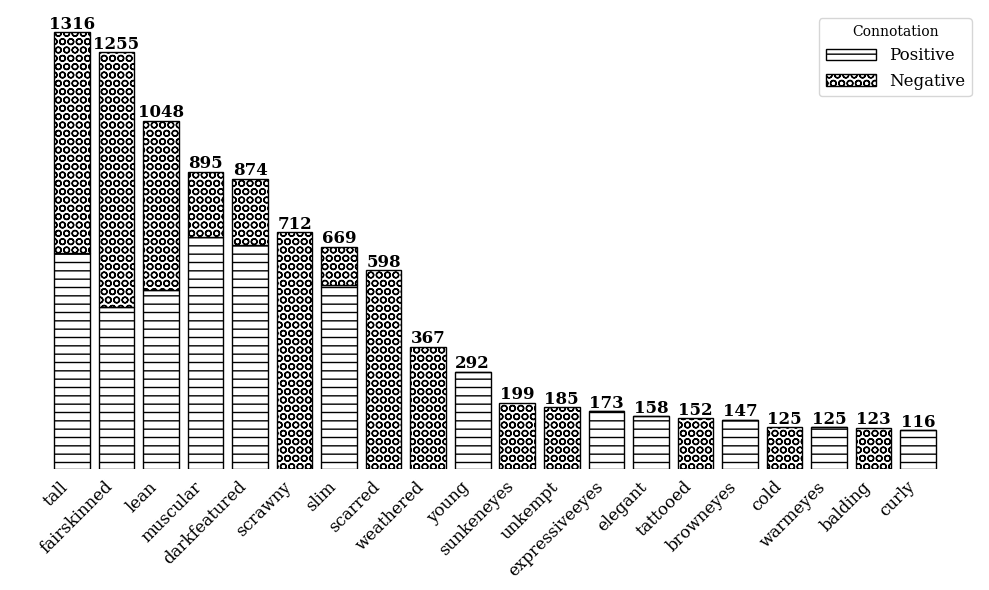

In [22]:
df_pivot = df.pivot(index="physicaldescription", columns="connotation", values="count").fillna(0)

df_pivot["total"] = df_pivot.sum(axis=1)
df_pivot = df_pivot.sort_values(by="total", ascending=False).drop(columns="total")
df_pivot = df_pivot.head(20)

plt.rcParams.update({
    "font.family": "serif",
    "text.usetex": False  # Set to True if using a LaTeX renderer
})

fig, ax = plt.subplots(figsize=(10, 6))

# Plotting stacked bars manually with patterns
bars1 = ax.bar(df_pivot.index, df_pivot["positive"], label="Positive", hatch=hatch_patterns[0], edgecolor="black", color="white")
bars2 = ax.bar(df_pivot.index, df_pivot["negative"], bottom=df_pivot["positive"], label="Negative", hatch=hatch_patterns[1], edgecolor="black", color="white")

for i, (pos, neg) in enumerate(zip(df_pivot["positive"], df_pivot["negative"])):
    total = int(pos + neg)  # Ensuring no decimal places
    ax.text(i, total + 10, str(total), ha="center", fontsize=12, fontweight="bold")

plt.xlabel("")
plt.ylabel("")
plt.title("")

ax.xaxis.set_ticks_position('none') 
ax.set_xticklabels(df_pivot.index, rotation=45, ha="right", fontsize=12)

ax.set_yticks([])  # Remove only y-axis ticks

# Removing all grid lines and both main spines
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.yaxis.grid(False)
ax.xaxis.grid(False)

plt.legend(title="Connotation", fontsize=12, handlelength=3)

plt.tight_layout()
plt.show()
plt.show()

In [23]:
result = chi_square_test(df, index_col='physicaldescription')
result

{'Chi-Square Statistic': np.float64(4972.7712),
 'p-value': np.float64(0.0),
 'Degrees of Freedom': 26}

In [24]:
result = compute_standardized_residuals(df, index_col='physicaldescription')
result

connotation,negative,positive
physicaldescription,,
balding,7.630965,-7.770716
bearded,5.998376,-6.108228
browneyes,-8.650649,8.809074
brownhair,-7.584540,7.723440
cold,7.692755,-7.833638
curly,-7.684560,7.825292
darkfeatured,-11.659110,11.872630
elegant,-8.968474,9.132720
expressiveeyes,-9.384542,9.556407


In [25]:
connotations = df["connotation"].unique()
result = compute_divergences(df, connotations, index_col='physicaldescription')
result

{'JSD': {'JSD(negative || positive)': np.float64(0.6861410966059751)},
 'KL': {'KL(negative || positive)': np.float64(10.556909395744272),
  'KL(positive || negative)': np.float64(5.89798630928896)}}

### Moral

In [26]:
from functions import process_mor_data
file_path = os.path.join(os.getcwd(), "csv", "processed_moraldescription_data.csv")
df = process_mor_data(file_path)
df

,moraldescription,connotation,count,relative_frequency
142,manipulative,negative,1706,0.228472
187,ruthless,negative,1686,0.225793
35,cunning,negative,529,0.070845
28,cold-hearted,negative,512,0.068568
168,power-hungry,negative,420,0.056247
192,selfish,negative,360,0.048212
231,vindictive,negative,255,0.034150
176,reckless,negative,245,0.032811
4,ambitious,negative,235,0.031472
228,vicious,negative,201,0.026918


C:\Users\edoar\AppData\Local\Temp\ipykernel_12528\668544552.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_pivot.index, rotation=45, ha="right", fontsize=12)


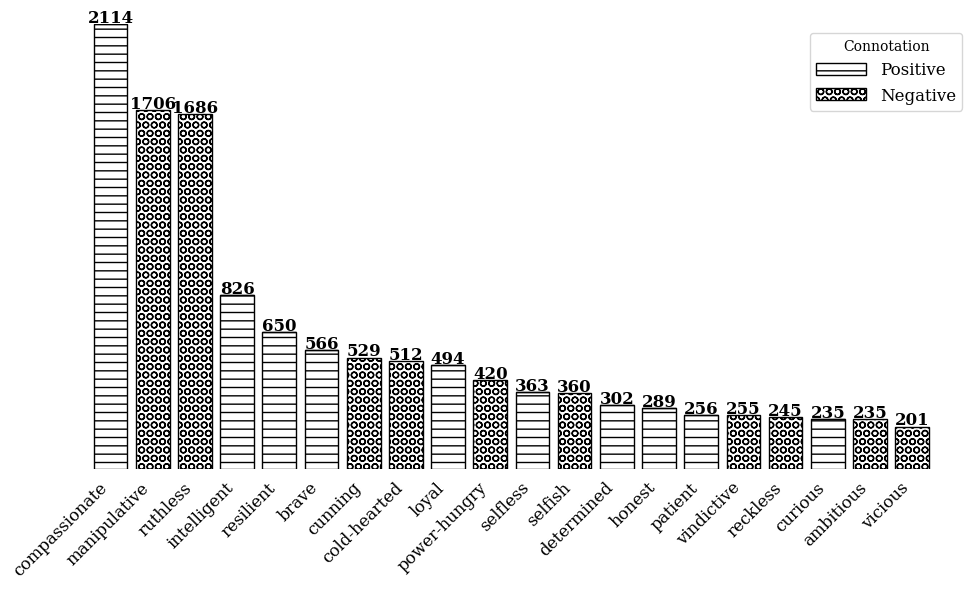

In [27]:
df_pivot = df.pivot(index="moraldescription", columns="connotation", values="count").fillna(0)

df_pivot["total"] = df_pivot.sum(axis=1)
df_pivot = df_pivot.sort_values(by="total", ascending=False).drop(columns="total")
df_pivot = df_pivot.head(20)

plt.rcParams.update({
    "font.family": "serif",
    "text.usetex": False  # Set to True if using a LaTeX renderer
})

fig, ax = plt.subplots(figsize=(10, 6))

# Plotting stacked bars manually with patterns
bars1 = ax.bar(df_pivot.index, df_pivot["positive"], label="Positive", hatch=hatch_patterns[0], edgecolor="black", color="white")
bars2 = ax.bar(df_pivot.index, df_pivot["negative"], bottom=df_pivot["positive"], label="Negative", hatch=hatch_patterns[1], edgecolor="black", color="white")

for i, (pos, neg) in enumerate(zip(df_pivot["positive"], df_pivot["negative"])):
    total = int(pos + neg)  # Ensuring no decimal places
    ax.text(i, total + 10, str(total), ha="center", fontsize=12, fontweight="bold")

plt.xlabel("")
plt.ylabel("")
plt.title("")

ax.xaxis.set_ticks_position('none') 
ax.set_xticklabels(df_pivot.index, rotation=45, ha="right", fontsize=12)

ax.set_yticks([])  # Remove only y-axis ticks

# Removing all grid lines and both main spines
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.yaxis.grid(False)
ax.xaxis.grid(False)

plt.legend(title="Connotation", fontsize=12, handlelength=3)

plt.tight_layout()
plt.show()

In [28]:
result = chi_square_test(df, index_col='moraldescription')
result

{'Chi-Square Statistic': np.float64(13520.0),
 'p-value': np.float64(0.0),
 'Degrees of Freedom': 29}

In [29]:
result = compute_standardized_residuals(df, index_col='moraldescription')
result

connotation,negative,positive
moraldescription,,
ambitious,11.170759,-10.948238
amoral,7.323344,-7.177463
authentic,-8.011382,7.851796
brave,-16.652523,16.320805
cold-hearted,16.488598,-16.160145
compassionate,-32.182836,31.541754
creative,-6.221360,6.097431
cunning,16.760099,-16.426238
curious,-10.730149,10.516405


In [30]:
connotations = df["connotation"].unique()
result = compute_divergences(df, connotations, index_col='moraldescription')
result

{'JSD': {'JSD(negative || positive)': np.float64(0.9999999999999999)},
 'KL': {'KL(negative || positive)': np.float64(20.83649283588059),
  'KL(positive || negative)': np.float64(20.675373328883516)}}

## Author Analysis - Gabriel Garcia Marquez

In [31]:
process_character_data('characters_output.json', keys_to_extract=None, writer_prefix="Gabriel Gar")

ethnicity data saved to csv\ethnicity_data_gabriel gar.csv
Processed ethnicity data saved to csv\processed_ethnicity_data_gabriel gar.csv
moral description data saved to csv\moraldescription_data_gabriel gar.csv
Processed moral description data saved to csv\processed_moraldescription_data_gabriel gar.csv
physical description data saved to csv\physicaldescription_data_gabriel gar.csv
Processed physical description data saved to csv\processed_physicaldescription_data_gabriel gar.csv
religion data saved to csv\religion_data_gabriel gar.csv
Processed religion data saved to csv\processed_religion_data_gabriel gar.csv
sex data saved to csv\sex_data_gabriel gar.csv
Processed sex data saved to csv\processed_sex_data_gabriel gar.csv


### Ethnicity

In [32]:
file_path = os.path.join(os.getcwd(), "csv", "processed_ethnicity_data_gabriel gar.csv")
df = process_ethnicity_data(file_path)
df

,ethnicity,connotation,count,relative_frequency
68,mestizo,negative,307,0.438571
52,indian,negative,219,0.312857
70,mexican,negative,27,0.038571
37,cuban,negative,22,0.031429
0,african,negative,19,0.027143
66,mayan,negative,12,0.017143
79,quechua,negative,11,0.015714
28,colombian,negative,10,0.014286
11,afro-descendant,negative,9,0.012857
20,aymara,negative,9,0.012857


C:\Users\edoar\AppData\Local\Temp\ipykernel_12528\1997335881.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_pivot.index, rotation=45, ha="right", fontsize=12)


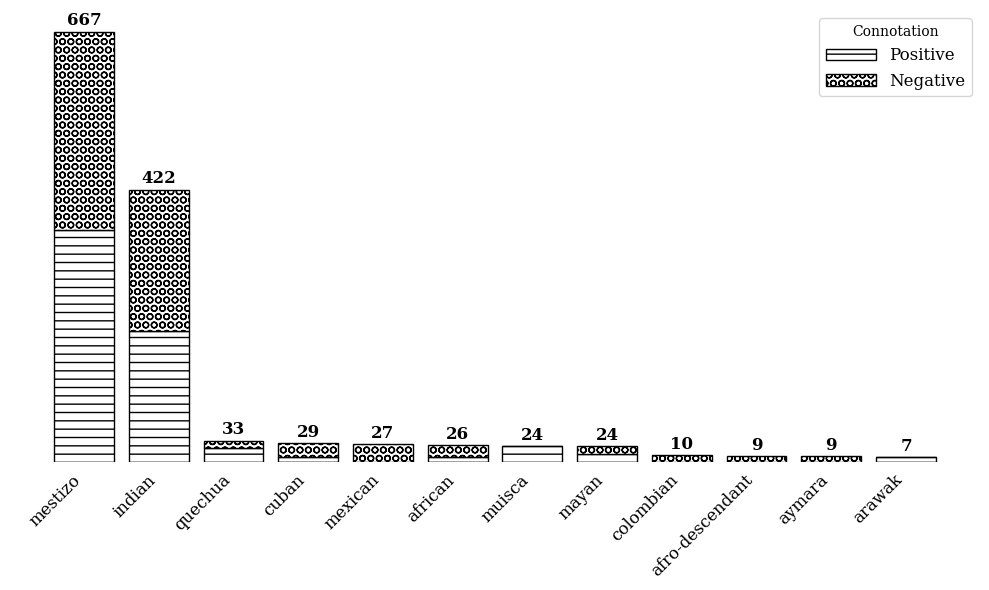

In [33]:
df_pivot = df.pivot(index="ethnicity", columns="connotation", values="count").fillna(0)

df_pivot["total"] = df_pivot.sum(axis=1)
df_pivot = df_pivot.sort_values(by="total", ascending=False).drop(columns="total")
df_pivot = df_pivot.head(20)

plt.rcParams.update({
    "font.family": "serif",
    "text.usetex": False  # Set to True if using a LaTeX renderer
})

fig, ax = plt.subplots(figsize=(10, 6))

# Plotting stacked bars manually with patterns
bars1 = ax.bar(df_pivot.index, df_pivot["positive"], label="Positive", hatch=hatch_patterns[0], edgecolor="black", color="white")
bars2 = ax.bar(df_pivot.index, df_pivot["negative"], bottom=df_pivot["positive"], label="Negative", hatch=hatch_patterns[1], edgecolor="black", color="white")

for i, (pos, neg) in enumerate(zip(df_pivot["positive"], df_pivot["negative"])):
    total = int(pos + neg)  # Ensuring no decimal places
    ax.text(i, total + 10, str(total), ha="center", fontsize=12, fontweight="bold")

plt.xlabel("")
plt.ylabel("")
plt.title("")

ax.xaxis.set_ticks_position('none') 
ax.set_xticklabels(df_pivot.index, rotation=45, ha="right", fontsize=12)

ax.set_yticks([])  # Remove only y-axis ticks

# Removing all grid lines and both main spines
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.yaxis.grid(False)
ax.xaxis.grid(False)

plt.legend(title="Connotation", fontsize=12, handlelength=3)

plt.tight_layout()
plt.show()

In [34]:
result = chi_square_test(df, index_col='ethnicity')
result

{'Chi-Square Statistic': np.float64(107.7754),
 'p-value': np.float64(0.0),
 'Degrees of Freedom': 11}

In [35]:
result = compute_standardized_residuals(df, index_col='ethnicity')
result

connotation,negative,positive
ethnicity,,
afro-descendant,2.113913,-2.118846
aymara,2.113913,-2.118846
colombian,2.228260,-2.233460
mexican,3.661405,-3.669950
muisca,-3.468137,3.476230


In [36]:
connotations = df["connotation"].unique()
result = compute_divergences(df, connotations, index_col='ethnicity')
result

{'JSD': {'JSD(negative || positive)': np.float64(0.28183297967990206)},
 'KL': {'KL(negative || positive)': np.float64(1.6491305302047936),
  'KL(positive || negative)': np.float64(1.0098402092129204)}}

### Sex

In [37]:
file_path = os.path.join(os.getcwd(), "csv", "processed_sex_data_gabriel gar.csv")
df = process_sex_data(file_path)
df

,sex,connotation,count,relative_frequency
2,male,negative,698,0.997143
0,female,negative,2,0.002857
3,male,positive,429,0.612857
1,female,positive,271,0.387143


C:\Users\edoar\AppData\Local\Temp\ipykernel_12528\3634420927.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_pivot.index, rotation=45, ha="right", fontsize=12)


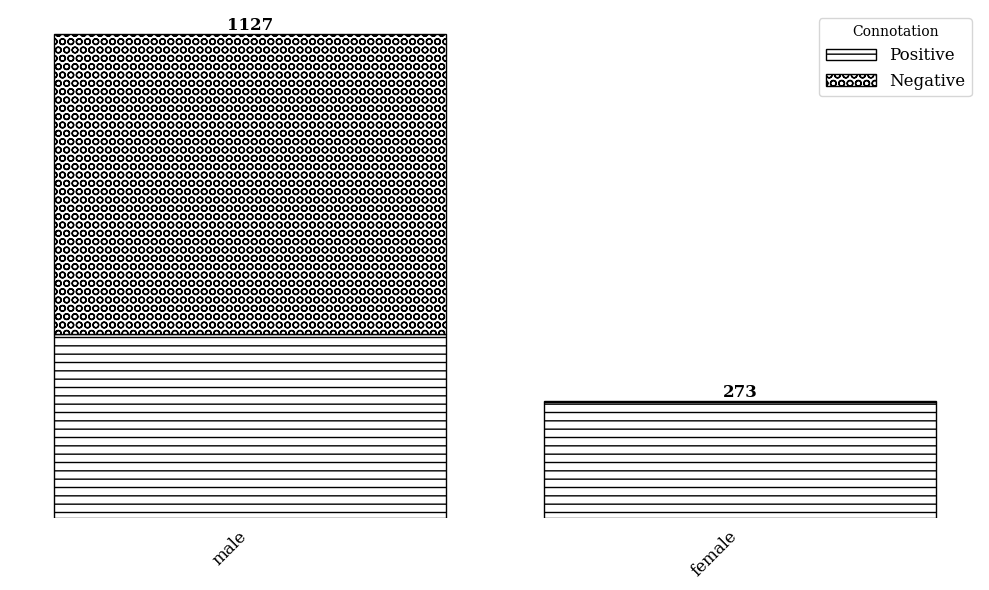

In [38]:
df_pivot = df.pivot(index="sex", columns="connotation", values="count").fillna(0)

df_pivot["total"] = df_pivot.sum(axis=1)
df_pivot = df_pivot.sort_values(by="total", ascending=False).drop(columns="total")

plt.rcParams.update({
    "font.family": "serif",
    "text.usetex": False  # Set to True if using a LaTeX renderer
})

fig, ax = plt.subplots(figsize=(10, 6))

# Plotting stacked bars manually with patterns
bars1 = ax.bar(df_pivot.index, df_pivot["positive"], label="Positive", hatch=hatch_patterns[0], edgecolor="black", color="white")
bars2 = ax.bar(df_pivot.index, df_pivot["negative"], bottom=df_pivot["positive"], label="Negative", hatch=hatch_patterns[1], edgecolor="black", color="white")

for i, (pos, neg) in enumerate(zip(df_pivot["positive"], df_pivot["negative"])):
    total = int(pos + neg)  # Ensuring no decimal places
    ax.text(i, total + 10, str(total), ha="center", fontsize=12, fontweight="bold")

plt.xlabel("")
plt.ylabel("")
plt.title("")

ax.xaxis.set_ticks_position('none') 
ax.set_xticklabels(df_pivot.index, rotation=45, ha="right", fontsize=12)

ax.set_yticks([])  # Remove only y-axis ticks

# Removing all grid lines and both main spines
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.yaxis.grid(False)
ax.xaxis.grid(False)

plt.legend(title="Connotation", fontsize=12, handlelength=3)

plt.tight_layout()
plt.show()

In [39]:
result = chi_square_test(df, index_col='sex')
result

{'Chi-Square Statistic': np.float64(326.8218),
 'p-value': np.float64(0.0),
 'Degrees of Freedom': 1}

In [40]:
result = compute_standardized_residuals(df, index_col='sex')
result

connotation,negative,positive
sex,,
female,-11.512137,11.512137
male,5.665984,-5.665984


In [41]:
connotations = df["connotation"].unique()
result = compute_divergences(df, connotations, index_col='sex')
result

{'JSD': {'JSD(negative || positive)': np.float64(0.4649924577908524)},
 'KL': {'KL(negative || positive)': np.float64(0.47134580147962934),
  'KL(positive || negative)': np.float64(1.6021576252310217)}}

### Religion

In [42]:
file_path = os.path.join(os.getcwd(), "csv", "processed_religion_data_gabriel gar.csv")
df = process_religion_data(file_path)
df

,religion,connotation,count,relative_frequency
18,christianity,negative,454,0.725240
9,atheism,negative,136,0.217252
39,paganism,negative,16,0.025559
19,christianity,positive,598,0.855508
8,animism,positive,22,0.031474
10,atheism,positive,9,0.012876
40,paganism,positive,8,0.011445


C:\Users\edoar\AppData\Local\Temp\ipykernel_12528\3533233493.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_pivot.index, rotation=45, ha="right", fontsize=12)


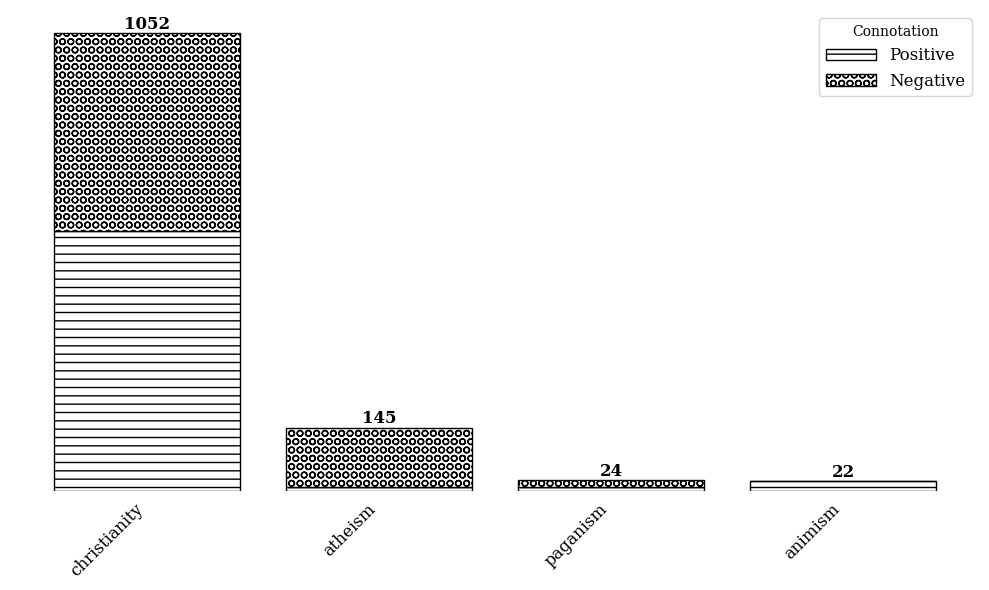

In [43]:
df_pivot = df.pivot(index="religion", columns="connotation", values="count").fillna(0)

df_pivot["total"] = df_pivot.sum(axis=1)
df_pivot = df_pivot.sort_values(by="total", ascending=False).drop(columns="total")

plt.rcParams.update({
    "font.family": "serif",
    "text.usetex": False  # Set to True if using a LaTeX renderer
})

fig, ax = plt.subplots(figsize=(10, 6))

# Plotting stacked bars manually with patterns
bars1 = ax.bar(df_pivot.index, df_pivot["positive"], label="Positive", hatch=hatch_patterns[0], edgecolor="black", color="white")
bars2 = ax.bar(df_pivot.index, df_pivot["negative"], bottom=df_pivot["positive"], label="Negative", hatch=hatch_patterns[1], edgecolor="black", color="white")

for i, (pos, neg) in enumerate(zip(df_pivot["positive"], df_pivot["negative"])):
    total = int(pos + neg)  # Ensuring no decimal places
    ax.text(i, total + 10, str(total), ha="center", fontsize=12, fontweight="bold")

plt.xlabel("")
plt.ylabel("")
plt.title("")

ax.xaxis.set_ticks_position('none') 
ax.set_xticklabels(df_pivot.index, rotation=45, ha="right", fontsize=12)

ax.set_yticks([])  # Remove only y-axis ticks

# Removing all grid lines and both main spines
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.yaxis.grid(False)
ax.xaxis.grid(False)

plt.legend(title="Connotation", fontsize=12, handlelength=3)

plt.tight_layout()
plt.show()

In [44]:
result = chi_square_test(df, index_col='religion')
result

{'Chi-Square Statistic': np.float64(154.9354),
 'p-value': np.float64(0.0),
 'Degrees of Freedom': 3}

In [45]:
result = compute_standardized_residuals(df, index_col='religion')
result

connotation,negative,positive
religion,,
animism,-3.275006,3.194322
atheism,7.767522,-7.576159
christianity,-2.599992,2.535938


In [46]:
connotations = df["connotation"].unique()
result = compute_divergences(df, connotations, index_col='religion')
result

{'JSD': {'JSD(negative || positive)': np.float64(0.3276670036917253)},
 'KL': {'KL(negative || positive)': np.float64(0.4712012227324168),
  'KL(positive || negative)': np.float64(0.8423888092298379)}}

### Physical

In [47]:
file_path = os.path.join(os.getcwd(), "csv", "processed_physicaldescription_data_gabriel gar.csv")
df = process_phy_data(file_path)
df

,physicaldescription,connotation,count,relative_frequency
549,scrawny,negative,397,0.113819
767,weathered,negative,319,0.091456
649,sunkeneyes,negative,292,0.083716
98,crookednose,negative,178,0.051032
592,slim,negative,153,0.043865
542,scarred,negative,132,0.037844
214,fairskinned,negative,131,0.037557
652,tall,negative,119,0.034117
16,balding,negative,100,0.028670
265,gaunt,negative,69,0.019782


C:\Users\edoar\AppData\Local\Temp\ipykernel_12528\48779605.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_pivot.index, rotation=45, ha="right", fontsize=12)


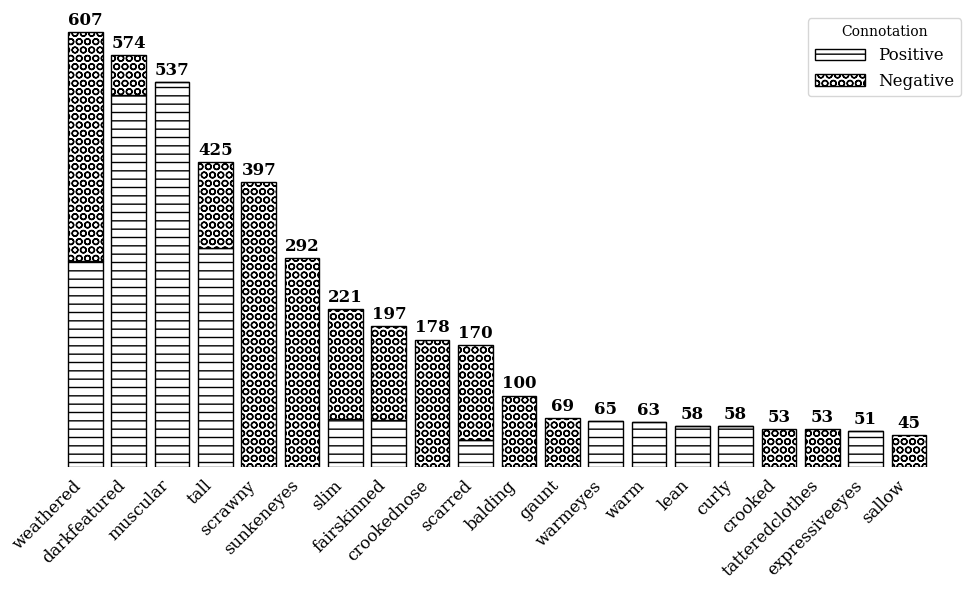

In [48]:
df_pivot = df.pivot(index="physicaldescription", columns="connotation", values="count").fillna(0)

df_pivot["total"] = df_pivot.sum(axis=1)
df_pivot = df_pivot.sort_values(by="total", ascending=False).drop(columns="total")
df_pivot = df_pivot.head(20)

plt.rcParams.update({
    "font.family": "serif",
    "text.usetex": False  # Set to True if using a LaTeX renderer
})

fig, ax = plt.subplots(figsize=(10, 6))

# Plotting stacked bars manually with patterns
bars1 = ax.bar(df_pivot.index, df_pivot["positive"], label="Positive", hatch=hatch_patterns[0], edgecolor="black", color="white")
bars2 = ax.bar(df_pivot.index, df_pivot["negative"], bottom=df_pivot["positive"], label="Negative", hatch=hatch_patterns[1], edgecolor="black", color="white")

for i, (pos, neg) in enumerate(zip(df_pivot["positive"], df_pivot["negative"])):
    total = int(pos + neg)  # Ensuring no decimal places
    ax.text(i, total + 10, str(total), ha="center", fontsize=12, fontweight="bold")

plt.xlabel("")
plt.ylabel("")
plt.title("")

ax.xaxis.set_ticks_position('none') 
ax.set_xticklabels(df_pivot.index, rotation=45, ha="right", fontsize=12)

ax.set_yticks([])  # Remove only y-axis ticks

# Removing all grid lines and both main spines
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.yaxis.grid(False)
ax.xaxis.grid(False)

plt.legend(title="Connotation", fontsize=12, handlelength=3)

plt.tight_layout()
plt.show()

In [49]:
result = chi_square_test(df, index_col='physicaldescription')
result

{'Chi-Square Statistic': np.float64(2738.9919),
 'p-value': np.float64(0.0),
 'Degrees of Freedom': 23}

In [50]:
result = compute_standardized_residuals(df, index_col='physicaldescription')
result

connotation,negative,positive
physicaldescription,,
balding,7.139314,-7.093695
browneyes,-4.675358,4.645483
crooked,5.197499,-5.164288
crookednose,9.525033,-9.464170
curly,-5.367877,5.333577
darkfeatured,-13.629685,13.542594
expressiveeyes,-5.033541,5.001378
fairskinned,3.349024,-3.327624
fat,4.223675,-4.196687


In [51]:
connotations = df["connotation"].unique()
result = compute_divergences(df, connotations, index_col='physicaldescription')
result

{'JSD': {'JSD(negative || positive)': np.float64(0.7756906042546479)},
 'KL': {'KL(negative || positive)': np.float64(12.028749886794285),
  'KL(positive || negative)': np.float64(9.161364745229692)}}

### Moral

In [52]:
file_path = os.path.join(os.getcwd(), "csv", "processed_moraldescription_data_gabriel gar.csv")
df = process_mor_data(file_path)
df

,moraldescription,connotation,count,relative_frequency
191,manipulative,negative,860,0.245925
260,ruthless,negative,732,0.209322
265,selfish,negative,355,0.101516
314,vindictive,negative,294,0.084072
36,cold-hearted,negative,140,0.040034
111,greedy,negative,112,0.032027
228,power-hungry,negative,76,0.021733
53,cunning,negative,69,0.019731
7,ambitious,negative,68,0.019445
241,reckless,negative,44,0.012582


C:\Users\edoar\AppData\Local\Temp\ipykernel_12528\668544552.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_pivot.index, rotation=45, ha="right", fontsize=12)


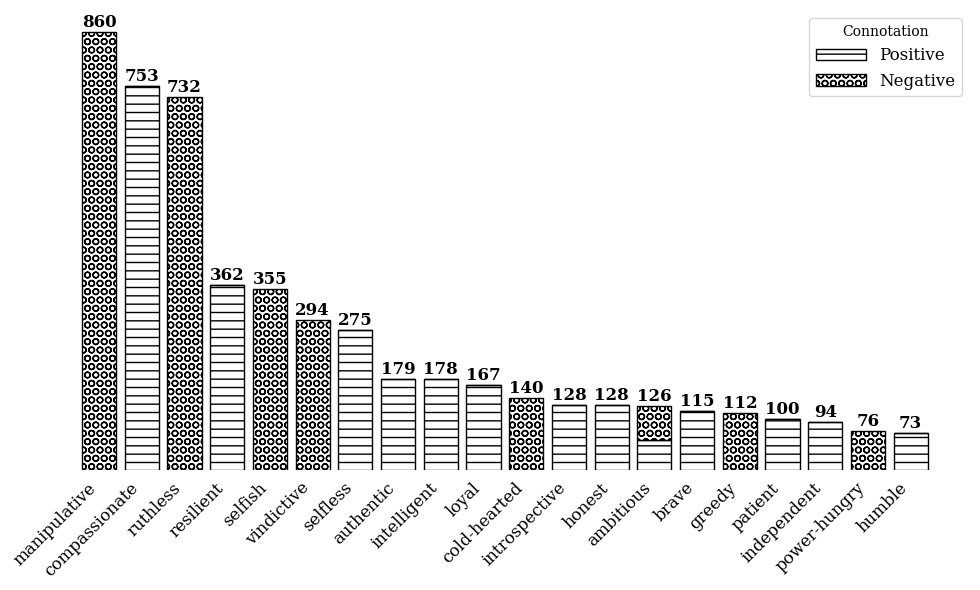

In [53]:
df_pivot = df.pivot(index="moraldescription", columns="connotation", values="count").fillna(0)

df_pivot["total"] = df_pivot.sum(axis=1)
df_pivot = df_pivot.sort_values(by="total", ascending=False).drop(columns="total")
df_pivot = df_pivot.head(20)

plt.rcParams.update({
    "font.family": "serif",
    "text.usetex": False  # Set to True if using a LaTeX renderer
})

fig, ax = plt.subplots(figsize=(10, 6))

# Plotting stacked bars manually with patterns
bars1 = ax.bar(df_pivot.index, df_pivot["positive"], label="Positive", hatch=hatch_patterns[0], edgecolor="black", color="white")
bars2 = ax.bar(df_pivot.index, df_pivot["negative"], bottom=df_pivot["positive"], label="Negative", hatch=hatch_patterns[1], edgecolor="black", color="white")

for i, (pos, neg) in enumerate(zip(df_pivot["positive"], df_pivot["negative"])):
    total = int(pos + neg)  # Ensuring no decimal places
    ax.text(i, total + 10, str(total), ha="center", fontsize=12, fontweight="bold")

plt.xlabel("")
plt.ylabel("")
plt.title("")

ax.xaxis.set_ticks_position('none') 
ax.set_xticklabels(df_pivot.index, rotation=45, ha="right", fontsize=12)

ax.set_yticks([])  # Remove only y-axis ticks

# Removing all grid lines and both main spines
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.yaxis.grid(False)
ax.xaxis.grid(False)

plt.legend(title="Connotation", fontsize=12, handlelength=3)

plt.tight_layout()
plt.show()

In [54]:
result = chi_square_test(df, index_col='moraldescription')
result

{'Chi-Square Statistic': np.float64(5709.7808),
 'p-value': np.float64(0.0),
 'Degrees of Freedom': 31}

In [55]:
result = compute_standardized_residuals(df, index_col='moraldescription')
result

connotation,negative,positive
moraldescription,,
authentic,-9.508153,9.604785
brave,-7.621116,7.698569
cold-hearted,8.240446,-8.324194
compassionate,-19.501460,19.699654
corrupt,4.459422,-4.504744
cunning,5.785105,-5.843899
curious,-6.030258,6.091544
cynical,4.566894,-4.613307
desperate,4.293174,-4.336806


In [56]:
connotations = df["connotation"].unique()
result = compute_divergences(df, connotations, index_col='moraldescription')
result

{'JSD': {'JSD(negative || positive)': np.float64(0.9891896313255909)},
 'KL': {'KL(negative || positive)': np.float64(20.505192424228866),
  'KL(positive || negative)': np.float64(20.113067897057096)}}

## Author vs No Author

In [57]:
process_character_data('characters_output.json', keys_to_extract=None, writer_prefix="Gabriel Gar")

ethnicity data saved to csv\ethnicity_data_gabriel gar.csv
Processed ethnicity data saved to csv\processed_ethnicity_data_gabriel gar.csv
moral description data saved to csv\moraldescription_data_gabriel gar.csv
Processed moral description data saved to csv\processed_moraldescription_data_gabriel gar.csv
physical description data saved to csv\physicaldescription_data_gabriel gar.csv
Processed physical description data saved to csv\processed_physicaldescription_data_gabriel gar.csv
religion data saved to csv\religion_data_gabriel gar.csv
Processed religion data saved to csv\processed_religion_data_gabriel gar.csv
sex data saved to csv\sex_data_gabriel gar.csv
Processed sex data saved to csv\processed_sex_data_gabriel gar.csv


In [58]:
file_path = os.path.join(os.getcwd(), "csv", "processed_ethnicity_data_gabriel gar.csv")
author = process_ethnicity_data(file_path)

file_path = os.path.join(os.getcwd(), "csv", "processed_ethnicity_data.csv")
no_author = process_ethnicity_data(file_path)

In [59]:
no_author['author'] = 'No Author'
author['author'] = 'Author'

### Ethnicity Distribution

In [60]:
df_list = [author, no_author]
df_concat = pd.concat(df_list)
df_grouped = df_concat.groupby(["ethnicity", "author"])["count"].sum().reset_index()
df_grouped

,ethnicity,author,count
0,african,Author,26
1,afro-descendant,Author,9
2,arab,No Author,66
3,arawak,Author,7
4,aymara,Author,9
5,caucasian,No Author,241
6,celtic,No Author,55
7,colombian,Author,10
8,cuban,Author,29
9,greek,No Author,22


In [61]:
from functions import chi_square_test_authors
result = chi_square_test_authors(df_grouped, index_col='ethnicity')
result

{'Chi-Square Statistic': np.float64(3149.409),
 'p-value': np.float64(0.0),
 'Degrees of Freedom': 29}

In [62]:
from functions import compute_standardized_residuals_authors
result = compute_standardized_residuals_authors(df_grouped, index_col='ethnicity')
result

author,Author,No Author
ethnicity,,
african,5.925872,-4.170023
afro-descendant,3.486477,-2.453426
arab,-4.675304,3.290001
arawak,3.074784,-2.163719
aymara,3.486477,-2.453426
caucasian,-8.934009,6.286842
celtic,-4.267949,3.003346
colombian,3.675070,-2.586138
cuban,6.258419,-4.404035


In [63]:
from functions import compute_divergences_authors
authors = df_grouped["author"].unique()
df_grouped["relative_frequency"] = df_grouped.groupby("author")["count"].transform(lambda x: x / x.sum())
result = compute_divergences_authors(df_grouped, authors, index_col='ethnicity')
result

{'JSD': {'JSD(Author || No Author)': np.float64(0.9108960329987086)},
 'KL': {'KL(Author || No Author)': np.float64(14.893616317877157),
  'KL(No Author || Author)': np.float64(18.54599388640745)}}

#### Positive Connotation - Ethnicity

In [64]:
no_author_pos = no_author[no_author['connotation'] == 'positive']
author_pos = author[author['connotation'] == 'positive']

In [65]:
df_list = [author_pos, no_author_pos]
df_concat = pd.concat(df_list)
df_concat

,ethnicity,connotation,count,relative_frequency,author
69,mestizo,positive,360,0.514286,Author
53,indian,positive,203,0.290000,Author
75,muisca,positive,24,0.034286,Author
80,quechua,positive,22,0.031429,Author
67,mayan,positive,12,0.017143,Author
1,african,positive,7,0.010000,Author
18,arawak,positive,7,0.010000,Author
38,cuban,positive,7,0.010000,Author
64,japanese,positive,709,0.472982,No Author
57,indian,positive,266,0.177452,No Author


In [66]:
result = chi_square_test_authors(df_concat, index_col='ethnicity')
result

{'Chi-Square Statistic': np.float64(1467.4571),
 'p-value': np.float64(0.0),
 'Degrees of Freedom': 16}

In [67]:
result = compute_standardized_residuals_authors(df_concat, index_col='ethnicity')
result

author,Author,No Author
ethnicity,,
african,3.163063,-2.178846
arawak,3.163063,-2.178846
cuban,3.163063,-2.178846
gujarati,-3.719892,2.562412
indian,4.238731,-2.919809
japanese,-15.104946,10.404897
kurdish,-3.403669,2.344585
mayan,4.141422,-2.852779
mestizo,22.683501,-15.625312


In [68]:
authors = df_concat["author"].unique()
result = compute_divergences_authors(df_concat, authors, index_col='ethnicity')
result

{'JSD': {'JSD(Author || No Author)': np.float64(0.8681901208084335)},
 'KL': {'KL(Author || No Author)': np.float64(15.110306469748936),
  'KL(No Author || Author)': np.float64(17.187825650766946)}}

#### Negative Connotation  - Ethnicity

In [69]:
no_author_neg = no_author[no_author['connotation'] == 'negative']
author_neg = author[author['connotation'] == 'negative']

In [70]:
df_list = [author_neg, no_author_neg]
df_concat = pd.concat(df_list)
df_concat

,ethnicity,connotation,count,relative_frequency,author
68,mestizo,negative,307,0.438571,Author
52,indian,negative,219,0.312857,Author
70,mexican,negative,27,0.038571,Author
37,cuban,negative,22,0.031429,Author
0,african,negative,19,0.027143,Author
66,mayan,negative,12,0.017143,Author
79,quechua,negative,11,0.015714,Author
28,colombian,negative,10,0.014286,Author
11,afro-descendant,negative,9,0.012857,Author
20,aymara,negative,9,0.012857,Author


In [71]:
result = chi_square_test_authors(df_concat, index_col='ethnicity')
result

{'Chi-Square Statistic': np.float64(1891.0),
 'p-value': np.float64(0.0),
 'Degrees of Freedom': 24}

In [72]:
result = compute_standardized_residuals_authors(df_concat, index_col='ethnicity')
result

author,Author,No Author
ethnicity,,
african,4.917781,-3.538263
afro-descendant,3.384649,-2.435199
arab,-4.744671,3.413712
aymara,3.384649,-2.435199
caucasian,-9.066562,6.523241
celtic,-4.331272,3.116279
colombian,3.567734,-2.566925
cuban,5.291804,-3.807366
indian,16.696079,-12.012553


In [73]:
authors = df_concat["author"].unique()
result = compute_divergences_authors(df_concat, authors, index_col='ethnicity')
result

{'JSD': {'JSD(Author || No Author)': np.float64(0.9999999999999999)},
 'KL': {'KL(Author || No Author)': np.float64(21.62645400729908),
  'KL(No Author || Author)': np.float64(20.749452871959978)}}

### Gender Distribution

In [74]:
file_path = os.path.join(os.getcwd(), "csv", "processed_sex_data_gabriel gar.csv")
author = process_sex_data(file_path)

file_path = os.path.join(os.getcwd(), "csv", "processed_sex_data.csv")
no_author = process_sex_data(file_path)

In [75]:
no_author['author'] = 'No Author'
author['author'] = 'Author'

In [76]:
df_list = [author, no_author]
df_concat = pd.concat(df_list)
df_grouped = df_concat.groupby(["sex", "author"])["count"].sum().reset_index()
df_grouped

,sex,author,count
0,female,Author,273
1,female,No Author,784
2,male,Author,1127
3,male,No Author,2210


In [77]:
result = chi_square_test_authors(df_grouped, index_col='sex')
result

{'Chi-Square Statistic': np.float64(22.9756),
 'p-value': np.float64(0.0),
 'Degrees of Freedom': 1}

In [78]:
result = compute_standardized_residuals_authors(df_grouped, index_col='sex')
result

author,Author,No Author
sex,,
female,-3.475326,2.376477


In [79]:
authors = df_grouped["author"].unique()
df_grouped["relative_frequency"] = df_grouped.groupby("author")["count"].transform(lambda x: x / x.sum())
result = compute_divergences_authors(df_grouped, authors, index_col='sex')
result

{'JSD': {'JSD(Author || No Author)': np.float64(0.06772422891233447)},
 'KL': {'KL(Author || No Author)': np.float64(0.012311499688983478),
  'KL(No Author || Author)': np.float64(0.013194727635426368)}}

#### Positive Connotation - Gender

In [80]:
no_author_pos = no_author[no_author['connotation'] == 'positive']
author_pos = author[author['connotation'] == 'positive']

In [81]:
df_list = [author_pos, no_author_pos]
df_concat = pd.concat(df_list)
df_concat

,sex,connotation,count,relative_frequency,author
3,male,positive,429,0.612857,Author
1,female,positive,271,0.387143,Author
1,female,positive,765,0.510340,No Author
3,male,positive,734,0.489660,No Author


In [82]:
result = chi_square_test_authors(df_concat, index_col='sex')
result

{'Chi-Square Statistic': np.float64(28.5739),
 'p-value': np.float64(0.0),
 'Degrees of Freedom': 1}

In [83]:
result = compute_standardized_residuals_authors(df_concat, index_col='sex')
result

author,Author,No Author
sex,,
female,-3.237126,2.212116
male,3.055270,-2.087843


In [84]:
authors = df_concat["author"].unique()
result = compute_divergences_authors(df_concat, authors, index_col='sex')
result

{'JSD': {'JSD(Author || No Author)': np.float64(0.10532943557902452)},
 'KL': {'KL(Author || No Author)': np.float64(0.030576726539049914),
  'KL(No Author || Author)': np.float64(0.031108800526009603)}}

#### Negative Connotation - Gender

In [85]:
no_author_neg = no_author[no_author['connotation'] == 'negative']
author_neg = author[author['connotation'] == 'negative']

In [86]:
df_list = [author_neg, no_author_neg]
df_concat = pd.concat(df_list)
df_concat

,sex,connotation,count,relative_frequency,author
2,male,negative,698,0.997143,Author
0,female,negative,2,0.002857,Author
2,male,negative,1476,0.987291,No Author
0,female,negative,19,0.012709,No Author


In [87]:
result = chi_square_test_authors(df_concat, index_col='sex')
result

{'Chi-Square Statistic': np.float64(3.8992),
 'p-value': np.float64(0.0483),
 'Degrees of Freedom': 1}

In [88]:
result = compute_standardized_residuals_authors(df_concat, index_col='sex')
result

author,Author,No Author
sex,,


In [89]:
authors = df_concat["author"].unique()
result = compute_divergences_authors(df_concat, authors, index_col='sex')
result

{'JSD': {'JSD(Author || No Author)': np.float64(0.049474155592168)},
 'KL': {'KL(Author || No Author)': np.float64(0.005636620108455444),
  'KL(No Author || Author)': np.float64(0.009165051300917814)}}

### Religion Distribution

In [90]:
file_path = os.path.join(os.getcwd(), "csv", "processed_religion_data_gabriel gar.csv")
author = process_religion_data(file_path)

file_path = os.path.join(os.getcwd(), "csv", "processed_religion_data.csv")
no_author = process_religion_data(file_path)

In [91]:
no_author['author'] = 'No Author'
author['author'] = 'Author'

In [92]:
df_list = [author, no_author]
df_concat = pd.concat(df_list)
df_grouped = df_concat.groupby(["religion", "author"])["count"].sum().reset_index()
df_grouped

,religion,author,count
0,animism,Author,22
1,atheism,Author,145
2,atheism,No Author,492
3,buddhism,No Author,249
4,christianity,Author,1052
5,christianity,No Author,323
6,hinduism,No Author,495
7,islam,No Author,274
8,paganism,Author,24
9,paganism,No Author,37


In [93]:
result = chi_square_test_authors(df_grouped, index_col='religion')
result

{'Chi-Square Statistic': np.float64(2182.1386),
 'p-value': np.float64(0.0),
 'Degrees of Freedom': 8}

In [94]:
result = compute_standardized_residuals_authors(df_grouped, index_col='religion')
result

author,Author,No Author
religion,,
animism,5.665859,-3.872388
atheism,-4.059687,2.774634
buddhism,-8.903901,6.085461
christianity,29.355276,-20.063158
hinduism,-12.554033,8.580180
islam,-9.340195,6.383650
shintoism,-14.778921,10.100802
sikhism,-5.781963,3.951741


In [95]:
authors = df_grouped["author"].unique()
df_grouped["relative_frequency"] = df_grouped.groupby("author")["count"].transform(lambda x: x / x.sum())
result = compute_divergences_authors(df_grouped, authors, index_col='religion')
result

{'JSD': {'JSD(Author || No Author)': np.float64(0.7582624678954457)},
 'KL': {'KL(Author || No Author)': np.float64(1.9323127860802394),
  'KL(No Author || Author)': np.float64(14.252651989848246)}}

#### Positive Connotation - Religion

In [96]:
no_author_pos = no_author[no_author['connotation'] == 'positive']
author_pos = author[author['connotation'] == 'positive']

In [97]:
df_list = [author_pos, no_author_pos]
df_concat = pd.concat(df_list)
df_concat

,religion,connotation,count,relative_frequency,author
19,christianity,positive,598,0.855508,Author
8,animism,positive,22,0.031474,Author
10,atheism,positive,9,0.012876,Author
40,paganism,positive,8,0.011445,Author
60,shintoism,positive,482,0.321548,No Author
16,hinduism,positive,442,0.294863,No Author
9,buddhism,positive,233,0.155437,No Author
62,sikhism,positive,105,0.070047,No Author
11,christianity,positive,104,0.069380,No Author
30,islam,positive,82,0.054703,No Author


In [98]:
result = chi_square_test_authors(df_concat, index_col='religion')
result

{'Chi-Square Statistic': np.float64(1667.4567),
 'p-value': np.float64(0.0),
 'Degrees of Freedom': 8}

In [99]:
result = compute_standardized_residuals_authors(df_concat, index_col='religion')
result

author,Author,No Author
religion,,
animism,5.893281,-3.908792
atheism,3.769355,-2.500072
buddhism,-8.437128,5.596031
christianity,26.188577,-17.369901
hinduism,-11.620580,7.707495
islam,-5.005225,3.319778
paganism,3.553782,-2.357090
shintoism,-12.135012,8.048698
sikhism,-5.663845,3.756616


In [100]:
authors = df_concat["author"].unique()
result = compute_divergences_authors(df_concat, authors, index_col='religion')
result

{'JSD': {'JSD(Author || No Author)': np.float64(0.901713815388643)},
 'KL': {'KL(Author || No Author)': np.float64(3.5913472154589354),
  'KL(No Author || Author)': np.float64(19.8122324950299)}}

##### Negative Connotation - Religion

In [101]:
no_author_neg = no_author[no_author['connotation'] == 'negative']
author_neg = author[author['connotation'] == 'negative']

In [102]:
df_list = [author_neg, no_author_neg]
df_concat = pd.concat(df_list)
df_concat

,religion,connotation,count,relative_frequency,author
18,christianity,negative,454,0.725240,Author
9,atheism,negative,136,0.217252,Author
39,paganism,negative,16,0.025559,Author
6,atheism,negative,492,0.383775,No Author
10,christianity,negative,219,0.170827,No Author
59,shintoism,negative,204,0.159126,No Author
29,islam,negative,192,0.149766,No Author
15,hinduism,negative,53,0.041342,No Author
48,paganism,negative,37,0.028861,No Author
8,buddhism,negative,16,0.012480,No Author


In [103]:
result = chi_square_test_authors(df_concat, index_col='religion')
result

{'Chi-Square Statistic': np.float64(624.1325),
 'p-value': np.float64(0.0),
 'Degrees of Freedom': 6}

In [104]:
result = compute_standardized_residuals_authors(df_concat, index_col='religion')
result

author,Author,No Author
religion,,
atheism,-5.061970,3.577878
christianity,15.346298,-10.846997
hinduism,-4.202018,2.970050
islam,-7.997801,5.652967
shintoism,-8.243944,5.826946


In [105]:
authors = df_concat["author"].unique()
result = compute_divergences_authors(df_concat, authors, index_col='religion')
result

{'JSD': {'JSD(Author || No Author)': np.float64(0.5878573658332119)},
 'KL': {'KL(Author || No Author)': np.float64(0.9294376813483961),
  'KL(No Author || Author)': np.float64(8.028971933088608)}}

### Physical Description - Distribution

In [106]:
file_path = os.path.join(os.getcwd(), "csv", "processed_physicaldescription_data_gabriel gar.csv")
author = process_phy_data(file_path)

file_path = os.path.join(os.getcwd(), "csv", "processed_physicaldescription_data.csv")
no_author = process_phy_data(file_path)

In [107]:
no_author['author'] = 'No Author'
author['author'] = 'Author'

In [108]:
df_list = [author, no_author]
df_concat = pd.concat(df_list)
df_grouped = df_concat.groupby(["physicaldescription", "author"])["count"].sum().reset_index()
df_grouped

,physicaldescription,author,count
0,balding,Author,100
1,balding,No Author,123
2,bearded,No Author,76
3,browneyes,Author,44
4,browneyes,No Author,147
5,brownhair,No Author,113
6,cold,No Author,125
7,crooked,Author,53
8,crookednose,Author,178
9,curly,Author,58


In [109]:
result = chi_square_test_authors(df_grouped, index_col='physicaldescription')
result

{'Chi-Square Statistic': np.float64(2908.8476),
 'p-value': np.float64(0.0),
 'Degrees of Freedom': 32}

In [110]:
result = compute_standardized_residuals_authors(df_grouped, index_col='physicaldescription')
result

author,Author,No Author
physicaldescription,,
balding,4.010333,-2.632102
bearded,-4.783484,3.139545
brownhair,-5.832796,3.828240
cold,-6.134689,4.026381
crooked,9.273225,-6.086297
crookednose,16.994284,-11.153860
darkfeatured,6.611387,-4.339253
elegant,-6.897093,4.526770
fairskinned,-11.486353,7.538839


In [111]:
authors = df_grouped["author"].unique()
df_grouped["relative_frequency"] = df_grouped.groupby("author")["count"].transform(lambda x: x / x.sum())
result = compute_divergences_authors(df_grouped, authors, index_col='physicaldescription')
result

{'JSD': {'JSD(Author || No Author)': np.float64(0.4444239678822018)},
 'KL': {'KL(Author || No Author)': np.float64(2.0144294376636154),
  'KL(No Author || Author)': np.float64(2.621573960451079)}}

#### Positive Connotation - Physical Description

In [112]:
no_author_pos = no_author[no_author['connotation'] == 'positive']
author_pos = author[author['connotation'] == 'positive']

In [113]:
df_list = [author_pos, no_author_pos]
df_concat = pd.concat(df_list)
df_concat

,physicaldescription,connotation,count,relative_frequency,author
431,muscular,positive,537,0.160299,Author
116,darkfeatured,positive,519,0.154925,Author
653,tall,positive,306,0.091343,Author
768,weathered,positive,288,0.085970,Author
593,slim,positive,68,0.020299,Author
215,fairskinned,positive,66,0.019701,Author
746,warmeyes,positive,65,0.019403,Author
741,warm,positive,63,0.018806,Author
107,curly,positive,58,0.017313,Author
379,lean,positive,58,0.017313,Author


In [114]:
result = chi_square_test_authors(df_concat, index_col='physicaldescription')
result

{'Chi-Square Statistic': np.float64(1692.0569),
 'p-value': np.float64(0.0),
 'Degrees of Freedom': 18}

In [115]:
result = compute_standardized_residuals_authors(df_concat, index_col='physicaldescription')
result

author,Author,No Author
physicaldescription,,
brownhair,-5.883176,3.909293
darkfeatured,8.015094,-5.325925
elegant,-6.956666,4.622613
fairskinned,-7.943554,5.278387
fulllips,7.624313,-5.066256
lean,-9.203595,6.115668
muscular,8.160717,-5.422689
petite,-4.887873,3.247928
radiant,-5.478803,3.640592


In [116]:
authors = df_concat["author"].unique()
result = compute_divergences_authors(df_concat, authors, index_col='physicaldescription')
result

{'JSD': {'JSD(Author || No Author)': np.float64(0.4800886820051308)},
 'KL': {'KL(Author || No Author)': np.float64(3.569647746892641),
  'KL(No Author || Author)': np.float64(3.171588845318264)}}

#### Negative Connotation - Physical Description

In [117]:
no_author_neg = no_author[no_author['connotation'] == 'negative']
author_neg = author[author['connotation'] == 'negative']

In [118]:
df_list = [author_neg, no_author_neg]
df_concat = pd.concat(df_list)
df_concat

,physicaldescription,connotation,count,relative_frequency,author
549,scrawny,negative,397,0.113819,Author
767,weathered,negative,319,0.091456,Author
649,sunkeneyes,negative,292,0.083716,Author
98,crookednose,negative,178,0.051032,Author
592,slim,negative,153,0.043865,Author
542,scarred,negative,132,0.037844,Author
214,fairskinned,negative,131,0.037557,Author
652,tall,negative,119,0.034117,Author
16,balding,negative,100,0.028670,Author
265,gaunt,negative,69,0.019782,Author


In [119]:
result = chi_square_test_authors(df_concat, index_col='physicaldescription')
result

{'Chi-Square Statistic': np.float64(2070.7703),
 'p-value': np.float64(0.0),
 'Degrees of Freedom': 21}

In [120]:
result = compute_standardized_residuals_authors(df_concat, index_col='physicaldescription')
result

author,Author,No Author
physicaldescription,,
balding,4.185153,-2.713515
bearded,-4.742698,3.075008
cold,-6.082381,3.943615
crooked,9.421387,-6.108516
crookednose,17.265808,-11.194579
fairskinned,-8.280613,5.368876
fat,7.656159,-4.964000
gaunt,3.469282,-2.249368
lean,-12.297847,7.973518


In [121]:
authors = df_concat["author"].unique()
result = compute_divergences_authors(df_concat, authors, index_col='physicaldescription')
result

{'JSD': {'JSD(Author || No Author)': np.float64(0.5308903617768522)},
 'KL': {'KL(Author || No Author)': np.float64(3.586381196372049),
  'KL(No Author || Author)': np.float64(4.969285298793346)}}

### Moral Description - Distribution

In [166]:
file_path = os.path.join(os.getcwd(), "csv", "processed_moraldescription_data_gabriel gar.csv")
author = process_mor_data(file_path)

file_path = os.path.join(os.getcwd(), "csv", "processed_moraldescription_data.csv")
no_author = process_mor_data(file_path)

In [167]:
no_author['author'] = 'No Author'
author['author'] = 'Author'

In [ ]:
df_list = [author, no_author]
df_concat = pd.concat(df_list)
df_grouped = df_concat.groupby(["moraldescription", "author"])["count"].sum().reset_index()
df_grouped = df_grouped.sort_values(by=["author", "count"], ascending=[True, False])

df_grouped

,moraldescription,author,count
34,manipulative,Author,860
9,compassionate,Author,753
48,ruthless,Author,732
42,resilient,Author,362
52,selfish,Author,355
57,vindictive,Author,294
54,selfless,Author,275
3,authentic,Author,179
28,intelligent,Author,178
32,loyal,Author,167


: 

In [125]:
result = chi_square_test_authors(df_grouped, index_col='moraldescription')
result

{'Chi-Square Statistic': np.float64(1722.8516),
 'p-value': np.float64(0.0),
 'Degrees of Freedom': 34}

In [126]:
result = compute_standardized_residuals_authors(df_grouped, index_col='moraldescription')
result

author,Author,No Author
moraldescription,,
amoral,-5.518036,3.625072
authentic,8.848761,-5.813191
brave,-6.302366,4.140337
cold-hearted,-4.034245,2.650296
compassionate,-3.786534,2.487562
corrupt,8.146135,-5.351601
creative,-4.880197,3.206044
cunning,-8.287906,5.444737
cynical,8.342456,-5.480573


In [127]:
authors = df_grouped["author"].unique()
df_grouped["relative_frequency"] = df_grouped.groupby("author")["count"].transform(lambda x: x / x.sum())
result = compute_divergences_authors(df_grouped, authors, index_col='moraldescription')
result

{'JSD': {'JSD(Author || No Author)': np.float64(0.28074509616570836)},
 'KL': {'KL(Author || No Author)': np.float64(0.9126782916121073),
  'KL(No Author || Author)': np.float64(0.6577041857949024)}}

#### Positive Connotation - Moral Description

In [128]:
no_author_pos = no_author[no_author['connotation'] == 'positive']
author_pos = author[author['connotation'] == 'positive']

In [129]:
df_list = [author_pos, no_author_pos]
df_concat = pd.concat(df_list)
df_concat

,moraldescription,connotation,count,relative_frequency,author
39,compassionate,positive,753,0.215327,Author
245,resilient,positive,362,0.103517,Author
267,selfless,positive,275,0.078639,Author
19,authentic,positive,179,0.051187,Author
152,intelligent,positive,178,0.050901,Author
179,loyal,positive,167,0.047755,Author
122,honest,positive,128,0.036603,Author
158,introspective,positive,128,0.036603,Author
25,brave,positive,115,0.032885,Author
220,patient,positive,100,0.028596,Author


In [130]:
result = chi_square_test_authors(df_concat, index_col='moraldescription')
result

{'Chi-Square Statistic': np.float64(935.2705),
 'p-value': np.float64(0.0),
 'Degrees of Freedom': 18}

In [131]:
result = compute_standardized_residuals_authors(df_concat, index_col='moraldescription')
result

author,Author,No Author
moraldescription,,
ambitious,9.879943,-6.393732
authentic,9.146702,-5.919220
brave,-6.066788,3.926077
compassionate,-3.206145,2.074833
creative,-4.828963,3.125028
determined,-4.756919,3.078405
independent,12.577791,-8.139624
intelligent,-6.875193,4.449230
introspective,6.692966,-4.331303


In [132]:
authors = df_concat["author"].unique()
result = compute_divergences_authors(df_concat, authors, index_col='moraldescription')
result

{'JSD': {'JSD(Author || No Author)': np.float64(0.27794206068169225)},
 'KL': {'KL(Author || No Author)': np.float64(1.3388007248045803),
  'KL(No Author || Author)': np.float64(0.3737359653418438)}}

#### Negative Connotation - Moral Description

In [133]:
no_author_neg = no_author[no_author['connotation'] == 'negative']
author_neg = author[author['connotation'] == 'negative']

In [134]:
df_list = [author_neg, no_author_neg]
df_concat = pd.concat(df_list)
df_concat

,moraldescription,connotation,count,relative_frequency,author
191,manipulative,negative,860,0.245925,Author
260,ruthless,negative,732,0.209322,Author
265,selfish,negative,355,0.101516,Author
314,vindictive,negative,294,0.084072,Author
36,cold-hearted,negative,140,0.040034,Author
111,greedy,negative,112,0.032027,Author
228,power-hungry,negative,76,0.021733,Author
53,cunning,negative,69,0.019731,Author
7,ambitious,negative,68,0.019445,Author
241,reckless,negative,44,0.012582,Author


In [135]:
result = chi_square_test_authors(df_concat, index_col='moraldescription')
result

{'Chi-Square Statistic': np.float64(923.1673),
 'p-value': np.float64(0.0),
 'Degrees of Freedom': 16}

In [136]:
result = compute_standardized_residuals_authors(df_concat, index_col='moraldescription')
result

author,Author,No Author
moraldescription,,
amoral,-5.576633,3.719649
cold-hearted,-4.288053,2.860158
corrupt,7.986261,-5.326886
cunning,-8.484488,5.659206
cynical,8.178729,-5.455263
desperate,7.688531,-5.128299
greedy,3.528949,-2.353831
power-hungry,-6.208310,4.140982
reckless,-4.768865,3.180863


In [137]:
authors = df_concat["author"].unique()
result = compute_divergences_authors(df_concat, authors, index_col='moraldescription')
result

{'JSD': {'JSD(Author || No Author)': np.float64(0.300592233142851)},
 'KL': {'KL(Author || No Author)': np.float64(0.9114972752059817),
  'KL(No Author || Author)': np.float64(1.013812672244665)}}

## Author vs Author - SKIP

In [138]:
from functions import process_character_data
process_character_data('characters_output.json', keys_to_extract=None, writer_prefix="Edgar Allan Poe")
process_character_data('characters_output.json', keys_to_extract=None, writer_prefix="Jane Austen")

ethnicity data saved to csv\ethnicity_data_edgar allan poe.csv
Processed ethnicity data saved to csv\processed_ethnicity_data_edgar allan poe.csv
moral description data saved to csv\moraldescription_data_edgar allan poe.csv
Processed moral description data saved to csv\processed_moraldescription_data_edgar allan poe.csv
physical description data saved to csv\physicaldescription_data_edgar allan poe.csv
Processed physical description data saved to csv\processed_physicaldescription_data_edgar allan poe.csv
religion data saved to csv\religion_data_edgar allan poe.csv
Processed religion data saved to csv\processed_religion_data_edgar allan poe.csv
sex data saved to csv\sex_data_edgar allan poe.csv
Processed sex data saved to csv\processed_sex_data_edgar allan poe.csv
ethnicity data saved to csv\ethnicity_data_jane austen.csv
Processed ethnicity data saved to csv\processed_ethnicity_data_jane austen.csv
moral description data saved to csv\moraldescription_data_jane austen.csv
Processed mora

In [139]:
from functions import process_ethnicity_data

file_path = os.path.join(os.getcwd(), "csv", "Processed_ethnicity_data_poe.csv")
poe = process_ethnicity_data(file_path)

file_path = os.path.join(os.getcwd(), "csv", "Processed_ethnicity_data_austen.csv")
austen = process_ethnicity_data(file_path)

In [140]:
poe['author'] = 'Poe'
austen['author'] = 'Austen'

### Ethnicity Distribution

In [141]:
df_list = [poe, austen]
df_concat = pd.concat(df_list)
df_grouped = df_concat.groupby(["ethnicity", "author"])["count"].sum().reset_index()
df_grouped

,ethnicity,author,count
0,afghan,Austen,8
1,african,Austen,77
2,african,Poe,3
3,africanamerican,Austen,8
4,africanamerican,Poe,32
5,arab,Poe,6
6,black,Austen,6
7,britishindian,Austen,4
8,cajun,Poe,21
9,caucasian,Austen,31


In [142]:
from functions import chi_square_test_authors
result = chi_square_test_authors(df_grouped, index_col='ethnicity')
result

{'Chi-Square Statistic': np.float64(518.4741),
 'p-value': np.float64(0.0),
 'Degrees of Freedom': 32}

In [143]:
from functions import compute_standardized_residuals_authors
result = compute_standardized_residuals_authors(df_grouped, index_col='ethnicity')
result

author,Austen,Poe
ethnicity,,
african,4.349794,-5.209386
africanamerican,-3.206807,3.840526
cajun,-3.517562,4.212690
caucasian,-2.133219,2.554778
celtic,-2.427348,2.907033
english,4.509471,-5.400617
englishindian,3.426797,-4.103989
french-canadian,-3.432789,4.111165
greek,-2.030865,2.432198


In [144]:
from functions import compute_divergences_authors
authors = df_grouped["author"].unique()
df_grouped["relative_frequency"] = df_grouped.groupby("author")["count"].transform(lambda x: x / x.sum())
result = compute_divergences_authors(df_grouped, authors, index_col='ethnicity')
result

{'JSD': {'JSD(Austen || Poe)': np.float64(0.7521262230331563)},
 'KL': {'KL(Austen || Poe)': np.float64(7.646134643935318),
  'KL(Poe || Austen)': np.float64(7.483859300977419)}}

### Positive - Ethnicity

In [145]:
poe_pos = poe[poe['connotation'] == 'positive']
austen_pos = austen[austen['connotation'] == 'positive']

In [146]:
df_list = [poe_pos, austen_pos]
df_concat = pd.concat(df_list)
df_concat

,ethnicity,connotation,count,relative_frequency,author
33,indian,positive,21,0.104478,Poe
25,french-canadian,positive,16,0.079602,Poe
35,irish,positive,16,0.079602,Poe
13,caucasian,positive,15,0.074627,Poe
54,persian,positive,15,0.074627,Poe
11,cajun,positive,12,0.059701,Poe
3,africanamerican,positive,11,0.054726,Poe
47,kurdish,positive,9,0.044776,Poe
39,japanese,positive,8,0.039801,Poe
15,celtic,positive,7,0.034826,Poe


In [147]:
result = chi_square_test_authors(df_concat, index_col='ethnicity')
result

{'Chi-Square Statistic': np.float64(209.7813),
 'p-value': np.float64(0.0),
 'Degrees of Freedom': 24}

In [148]:
result = compute_standardized_residuals_authors(df_concat, index_col='ethnicity')
result

author,Austen,Poe
ethnicity,,
african,2.811862,-2.762671
africanamerican,-2.324423,2.283759
cajun,-2.427780,2.385309
cree,2.178059,-2.139956
english,2.811862,-2.762671
englishindian,2.716517,-2.668994
french-canadian,-2.803359,2.754317
indian,4.263792,-4.189201
persian,-2.714341,2.666856


In [149]:
authors = df_concat["author"].unique()
result = compute_divergences_authors(df_concat, authors, index_col='ethnicity')
result

{'JSD': {'JSD(Poe || Austen)': np.float64(0.7673080624812966)},
 'KL': {'KL(Poe || Austen)': np.float64(12.600899879532536),
  'KL(Austen || Poe)': np.float64(7.803355110016077)}}

### Negative - Ethnicity

In [150]:
poe_neg = poe[poe['connotation'] == 'negative']
austen_neg = austen[austen['connotation'] == 'negative']

In [151]:
df_list = [poe_neg, austen_neg]
df_concat = pd.concat(df_list)
df_concat

,ethnicity,connotation,count,relative_frequency,author
34,irish,negative,88,0.437811,Poe
12,caucasian,negative,31,0.154229,Poe
2,africanamerican,negative,21,0.104478,Poe
10,cajun,negative,9,0.044776,Poe
46,kurdish,negative,9,0.044776,Poe
24,french-canadian,negative,4,0.019900,Poe
1,african,negative,3,0.014925,Poe
6,arab,negative,3,0.014925,Poe
14,celtic,negative,3,0.014925,Poe
28,gypsy,negative,3,0.014925,Poe


In [152]:
result = chi_square_test_authors(df_concat, index_col='ethnicity')
result

{'Chi-Square Statistic': np.float64(311.9793),
 'p-value': np.float64(0.0),
 'Degrees of Freedom': 20}

In [153]:
result = compute_standardized_residuals_authors(df_concat, index_col='ethnicity')
result

author,Austen,Poe
ethnicity,,
african,2.985641,-4.107460
africanamerican,-2.519432,3.466079
cajun,-2.426659,3.338447
english,3.198231,-4.399929
englishindian,2.220740,-3.055157
indian,3.676476,-5.057868
irish,-5.958347,8.197125


In [154]:
authors = df_concat["author"].unique()
result = compute_divergences_authors(df_concat, authors, index_col='ethnicity')
result

{'JSD': {'JSD(Poe || Austen)': np.float64(0.7804045552974412)},
 'KL': {'KL(Poe || Austen)': np.float64(4.068909359970862),
  'KL(Austen || Poe)': np.float64(12.680570681122289)}}

## Logit Model - No Author

In [155]:
from functions import process_data_model
df=process_data_model('characters_no_writer.json')

In [156]:
df = df[['sex', 'religion', 'ethnicity', 'connotation']]

# One-hot encoding for categorical variables
df = pd.get_dummies(df, columns=["ethnicity", "sex", "religion"], drop_first=True)

# Check encoded dataset
df.head()


,connotation,ethnicity_caucasian,ethnicity_gujarati,ethnicity_indian,ethnicity_japanese,ethnicity_kurdish,ethnicity_punjabi,ethnicity_romanian,ethnicity_russian,ethnicity_sikh,sex_male,religion_buddhism,religion_christianity,religion_hinduism,religion_islam,religion_paganism,religion_secular,religion_shintoism,religion_sikhism,religion_zoroastrianism
1,positive,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False
2,positive,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False
3,positive,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False
4,positive,False,False,False,True,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False
5,positive,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False


In [157]:
from scipy.stats import chi2_contingency

# Function to compute Phi Coefficient
def phi_coefficient(x, y):
    contingency_table = pd.crosstab(x, y)
    chi2, _, _, _ = chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()
    return np.sqrt(chi2 / n)

# Select only numeric independent variables (excluding target variable)
X = df.drop(columns=["connotation"])

X = X.astype(int)
X.columns = X.columns.str.replace(" ", "_").str.replace("-", "_")

# Compute Phi Coefficient matrix
num_vars = X.shape[1]
phi_matrix = np.zeros((num_vars, num_vars))

for i in range(num_vars):
    for j in range(i + 1, num_vars):  # Only compute upper triangle
        phi_matrix[i, j] = phi_coefficient(X.iloc[:, i], X.iloc[:, j])
        phi_matrix[j, i] = phi_matrix[i, j]  # Symmetric matrix

# Convert to DataFrame
phi_df = pd.DataFrame(phi_matrix, index=X.columns, columns=X.columns)

# Set correlation threshold
threshold = 0.7  

# Find highly correlated pairs (excluding self-correlations)
high_corr_pairs = (
    phi_df.where(np.triu(np.ones(phi_df.shape), k=1).astype(bool))
    .stack()
    .reset_index()
)

high_corr_pairs.columns = ["Variable 1", "Variable 2", "Phi Coefficient"]

# Filter only correlations above threshold
high_corr_pairs = high_corr_pairs[high_corr_pairs["Phi Coefficient"] > threshold]

if not high_corr_pairs.empty:
    print("Highly Correlated Variables (ϕ > {}):".format(threshold))
    print(high_corr_pairs)
else:
    print("No variable pairs have Phi Coefficient above", threshold)


Highly Correlated Variables (ϕ > 0.7):
             Variable 1             Variable 2  Phi Coefficient
44     ethnicity_indian      religion_hinduism         0.752441
63   ethnicity_japanese     religion_shintoism         0.770653
108   ethnicity_russian  religion_christianity         0.717788


In [158]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Compute Variance Inflation Factor (VIF)
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Round VIF values for better readability
vif_data["VIF"] = vif_data["VIF"].round(2)

# Display VIF results
print("Variance Inflation Factor (VIF) Analysis:")
print(vif_data)

# Identify high VIF variables (commonly, VIF > 5 or 10 is problematic)
high_vif_features = vif_data[vif_data["VIF"] > 5]
if not high_vif_features.empty:
    print("\n Warning: High Multicollinearity Detected in the Following Features (VIF > 5):")
    print(high_vif_features)
else:
    print("\n No severe multicollinearity detected (all VIF values ≤ 5).")


Variance Inflation Factor (VIF) Analysis:
                    Feature    VIF
0       ethnicity_caucasian   2.28
1        ethnicity_gujarati   3.60
2          ethnicity_indian  13.07
3        ethnicity_japanese  34.96
4         ethnicity_kurdish   1.66
5         ethnicity_punjabi   4.81
6        ethnicity_romanian   1.90
7         ethnicity_russian   2.88
8            ethnicity_sikh   4.96
9                  sex_male   9.45
10        religion_buddhism   8.07
11    religion_christianity   2.56
12        religion_hinduism  19.10
13           religion_islam   2.05
14        religion_paganism   1.09
15         religion_secular   1.02
16       religion_shintoism  22.03
17         religion_sikhism   4.90
18  religion_zoroastrianism   1.05

               Feature    VIF
2     ethnicity_indian  13.07
3   ethnicity_japanese  34.96
9             sex_male   9.45
10   religion_buddhism   8.07
12   religion_hinduism  19.10
16  religion_shintoism  22.03


In [159]:
religion_columns = ["religion_hinduism", "religion_shintoism"]
df = df.drop(columns=religion_columns, errors="ignore")  

In [160]:
from functions import logistic_regression_analysis
logistic_regression_analysis(df)


Model Evaluation:
Accuracy: 0.8716

Classification Report:
              precision    recall  f1-score    support
0              0.971631  0.724868  0.830303  189.00000
1              0.823729  0.983806  0.896679  247.00000
accuracy       0.871560  0.871560  0.871560    0.87156
macro avg      0.897680  0.854337  0.863491  436.00000
weighted avg   0.887842  0.871560  0.867906  436.00000

Feature Importance (Odds Ratios):
                Feature  Coefficient  Odds Ratio  Standard Error      p-value  Lower 95% CI  Upper 95% CI  Significant
     ethnicity_japanese     3.850682   47.025119        0.772772 6.262232e-07  1.034059e+01  2.138525e+02         True
       ethnicity_indian     2.447553   11.560024        0.543409 6.666316e-06  3.984817e+00  3.353583e+01         True
         ethnicity_sikh     1.305474    3.689437        0.342824 1.400933e-04  1.884291e+00  7.223907e+00         True
  religion_christianity     1.184813    3.270074        0.305956 1.077292e-04  1.795259e+00  5.9564

c:\Users\edoar\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\edoar\Documents\Tesi\thesis\functions.py:923: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept = sm_model.params[0]
c:\Users\edoar\Documents\Tesi\thesis\functions.py:937: RuntimeWarning: overflow encountered in exp
  'Upper 95% CI': np.exp(confidence_intervals[1].values),


{'accuracy': 0.8715596330275229,
 'classification_report': {'0': {'precision': 0.9716312056737588,
   'recall': 0.7248677248677249,
   'f1-score': 0.8303030303030303,
   'support': 189.0},
  '1': {'precision': 0.823728813559322,
   'recall': 0.9838056680161943,
   'f1-score': 0.8966789667896679,
   'support': 247.0},
  'accuracy': 0.8715596330275229,
  'macro avg': {'precision': 0.8976800096165405,
   'recall': 0.8543366964419596,
   'f1-score': 0.863490998546349,
   'support': 436.0},
  'weighted avg': {'precision': 0.8878424651869105,
   'recall': 0.8715596330275229,
   'f1-score': 0.8679059117530292,
   'support': 436.0}},
 'feature_significance':                      Feature  Coefficient  Odds Ratio  Standard Error  \
 x4        ethnicity_japanese     3.850682   47.025119        0.772772   
 x3          ethnicity_indian     2.447553   11.560024        0.543409   
 x9            ethnicity_sikh     1.305474    3.689437        0.342824   
 x12    religion_christianity     1.184813    

## Logit Model - Gabriel Garcia Marquez

In [161]:
from functions import process_data_model_author
df = process_data_model_author('characters_output.json', writer_prefix='Gabriel Gar')


In [162]:
df = df[['sex', 'religion', 'ethnicity', 'connotation']]

# One-hot encoding for categorical variables
df = pd.get_dummies(df, columns=["ethnicity", "sex", "religion"], drop_first=True)

# Check encoded dataset
df.head()

,connotation,ethnicity_afro-descendant,ethnicity_colombian,ethnicity_cuban,ethnicity_indian,ethnicity_mayan,ethnicity_mestizo,ethnicity_mexican,ethnicity_muisca,ethnicity_quechua,sex_male,religion_atheism,religion_christianity,religion_hinduism,religion_paganism,religion_secular,religion_shamanic,religion_spirituality,religion_syncretism
1,negative,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False
2,negative,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False
3,negative,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False
4,negative,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False
5,negative,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False


In [163]:
from scipy.stats import chi2_contingency

# Function to compute Phi Coefficient
def phi_coefficient(x, y):
    contingency_table = pd.crosstab(x, y)
    chi2, _, _, _ = chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()
    return np.sqrt(chi2 / n)

# Select only numeric independent variables (excluding target variable)
X = df.drop(columns=["connotation"])

X = X.astype(int)
X.columns = X.columns.str.replace(" ", "_").str.replace("-", "_")

# Compute Phi Coefficient matrix
num_vars = X.shape[1]
phi_matrix = np.zeros((num_vars, num_vars))

for i in range(num_vars):
    for j in range(i + 1, num_vars):  # Only compute upper triangle
        phi_matrix[i, j] = phi_coefficient(X.iloc[:, i], X.iloc[:, j])
        phi_matrix[j, i] = phi_matrix[i, j]  # Symmetric matrix

# Convert to DataFrame
phi_df = pd.DataFrame(phi_matrix, index=X.columns, columns=X.columns)

# Set correlation threshold
threshold = 0.7  

# Find highly correlated pairs (excluding self-correlations)
high_corr_pairs = (
    phi_df.where(np.triu(np.ones(phi_df.shape), k=1).astype(bool))
    .stack()
    .reset_index()
)

high_corr_pairs.columns = ["Variable 1", "Variable 2", "Phi Coefficient"]

# Filter only correlations above threshold
high_corr_pairs = high_corr_pairs[high_corr_pairs["Phi Coefficient"] > threshold]

if not high_corr_pairs.empty:
    print("Highly Correlated Variables (ϕ > {}):".format(threshold))
    print(high_corr_pairs)
else:
    print("No variable pairs have Phi Coefficient above", threshold)


Highly Correlated Variables (ϕ > 0.7):
           Variable 1             Variable 2  Phi Coefficient
49   ethnicity_indian      ethnicity_mestizo         0.715882
125  religion_atheism  religion_christianity         0.771207


In [164]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Compute Variance Inflation Factor (VIF)
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Round VIF values for better readability
vif_data["VIF"] = vif_data["VIF"].round(2)

# Display VIF results
print("Variance Inflation Factor (VIF) Analysis:")
print(vif_data)

# Identify high VIF variables (commonly, VIF > 5 or 10 is problematic)
high_vif_features = vif_data[vif_data["VIF"] > 5]
if not high_vif_features.empty:
    print("\n Warning: High Multicollinearity Detected in the Following Features (VIF > 5):")
    print(high_vif_features)
else:
    print("\n No severe multicollinearity detected (all VIF values ≤ 5).")

Variance Inflation Factor (VIF) Analysis:
                      Feature    VIF
0   ethnicity_afro_descendant   1.39
1         ethnicity_colombian   1.34
2             ethnicity_cuban   1.64
3            ethnicity_indian   8.98
4             ethnicity_mayan   1.55
5           ethnicity_mestizo  16.79
6           ethnicity_mexican   1.63
7            ethnicity_muisca   1.63
8           ethnicity_quechua   1.80
9                    sex_male   5.07
10           religion_atheism   3.89
11      religion_christianity  25.48
12          religion_hinduism   1.10
13          religion_paganism   1.42
14           religion_secular   1.03
15          religion_shamanic   1.07
16      religion_spirituality   1.45
17        religion_syncretism   1.05

                  Feature    VIF
3        ethnicity_indian   8.98
5       ethnicity_mestizo  16.79
9                sex_male   5.07
11  religion_christianity  25.48


In [165]:
from functions import logistic_regression_analysis
logistic_regression_analysis(df)


Model Evaluation:
Accuracy: 0.6846

Classification Report:
              precision    recall  f1-score     support
0              0.590909  0.962963  0.732394  108.000000
1              0.938462  0.458647  0.616162  133.000000
accuracy       0.684647  0.684647  0.684647    0.684647
macro avg      0.764685  0.710805  0.674278  241.000000
weighted avg   0.782712  0.684647  0.668249  241.000000

Feature Importance (Odds Ratios):
                  Feature  Coefficient    Odds Ratio  Standard Error      p-value  Lower 95% CI  Upper 95% CI  Significant
      religion_syncretism    12.433623 251104.009707             NaN          NaN           NaN           NaN        False
        religion_hinduism     1.421446      4.143108    43030.752500 9.999736e-01      0.000000           inf        False
        religion_shamanic     1.332946      3.792200    11422.851551 9.999069e-01      0.000000           inf        False
        ethnicity_mestizo     0.242877      1.274912        0.424494 5.672159

c:\Users\edoar\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\edoar\Documents\Tesi\thesis\functions.py:923: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept = sm_model.params[0]
c:\Users\edoar\Documents\Tesi\thesis\functions.py:937: RuntimeWarning: overflow encountered in exp
  'Upper 95% CI': np.exp(confidence_intervals[1].values),


{'accuracy': 0.6846473029045643,
 'classification_report': {'0': {'precision': 0.5909090909090909,
   'recall': 0.9629629629629629,
   'f1-score': 0.7323943661971831,
   'support': 108.0},
  '1': {'precision': 0.9384615384615385,
   'recall': 0.45864661654135336,
   'f1-score': 0.6161616161616161,
   'support': 133.0},
  'accuracy': 0.6846473029045643,
  'macro avg': {'precision': 0.7646853146853148,
   'recall': 0.7108047897521581,
   'f1-score': 0.6742779911793997,
   'support': 241.0},
  'weighted avg': {'precision': 0.7827118939152135,
   'recall': 0.6846473029045643,
   'f1-score': 0.6682493215717458,
   'support': 241.0}},
 'feature_significance':                        Feature  Coefficient     Odds Ratio  Standard Error  \
 x18        religion_syncretism    12.433623  251104.009707             NaN   
 x13          religion_hinduism     1.421446       4.143108    43030.752500   
 x16          religion_shamanic     1.332946       3.792200    11422.851551   
 x6           ethnicity